In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Caminho do Dataset
file = 'C:/Users/danil/Desktop/Projeto DSBI/Dataset.xlsx'

# Ler o ficheiro Excel
df = pd.read_excel(file)

# Função para remover espaços em branco extras e caracteres especiais
def limpar_texto(texto):
    # Remover espaços em branco extras
    texto = texto.strip()
    return texto

# Ler o ficheiro Excel e aplicar a função de limpeza
df = pd.read_excel(file, converters={'coluna_com_texto': limpar_texto})

# Verificar se existem valores nulos
print(df.isnull().sum())

# Visualizar as primeiras linhas do DataFrame para garantir que os dados foram lidos corretamente
print(df.head())

Ano                                                      0
Mês                                                      0
Dia                                                      0
Hora                                                     0
Preço marginal Espanha (EUR/MWh)                         0
Preço marginal Portugal (EUR/MWh)                        0
Energia Total de compra Espanha (MWh)                    0
Energia Total de venda Espanha (MWh)                     0
Energia Total de compra Portugal (MWh)                   0
Energia Total de venda Portugal (MWh)                    0
Energia total do Mercado Ibérico (MWh)                   0
Energia total com bilaterais do Mercado Ibérico (MWh)    0
Importação de Espanha desde Portugal (MWh)               0
Exportação de Espanha para Portugal (MWh)                0
Temperatura                                              0
Orvalho                                                  0
Humidade                                                

In [2]:
# Verificar informações sobre os dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55271 entries, 0 to 55270
Data columns (total 26 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Ano                                                    55271 non-null  int64  
 1   Mês                                                    55271 non-null  int64  
 2   Dia                                                    55271 non-null  int64  
 3   Hora                                                   55271 non-null  int64  
 4   Preço marginal Espanha (EUR/MWh)                       55271 non-null  float64
 5   Preço marginal Portugal (EUR/MWh)                      55271 non-null  float64
 6   Energia Total de compra Espanha (MWh)                  55271 non-null  float64
 7   Energia Total de venda Espanha (MWh)                   55271 non-null  float64
 8   Energia Total de compra Portugal (MWh)        

In [3]:
# Obter estatísticas descritivas dos dados numéricos
print(df.describe())

                Ano           Mês           Dia          Hora  \
count  55271.000000  55271.000000  55271.000000  55271.000000   
mean    2020.670370      6.319535     15.678909     12.499900   
std        1.828357      3.486420      8.785538      6.922327   
min     2018.000000      1.000000      1.000000      1.000000   
25%     2019.000000      3.000000      8.000000      6.500000   
50%     2021.000000      6.000000     16.000000     12.000000   
75%     2022.000000      9.000000     23.000000     18.000000   
max     2024.000000     12.000000     31.000000     25.000000   

       Preço marginal Espanha (EUR/MWh)  Preço marginal Portugal (EUR/MWh)  \
count                      55271.000000                       55271.000000   
mean                          81.914524                          82.209234   
std                           64.061626                          63.916817   
min                           -1.500000                          -0.630000   
25%                     

# Visualizar a distribuição dos preços da eletricidade na Espanha e em Portugal

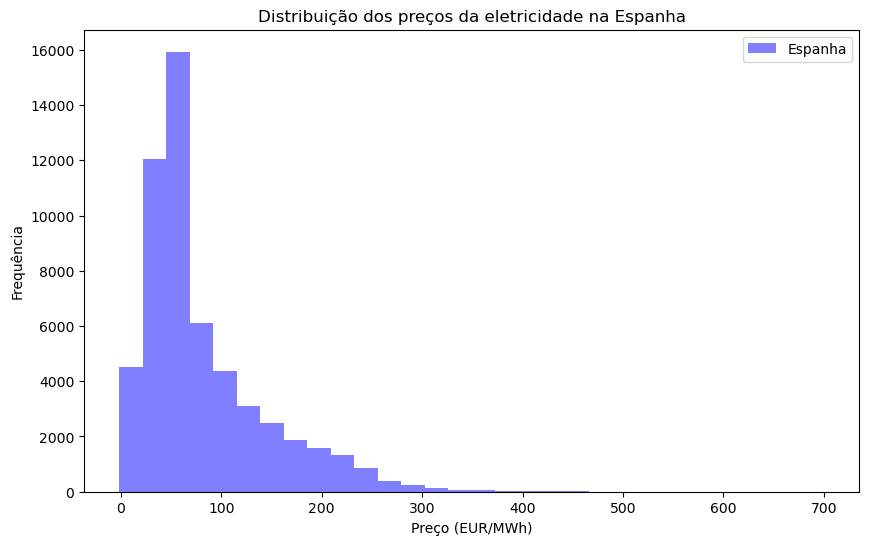

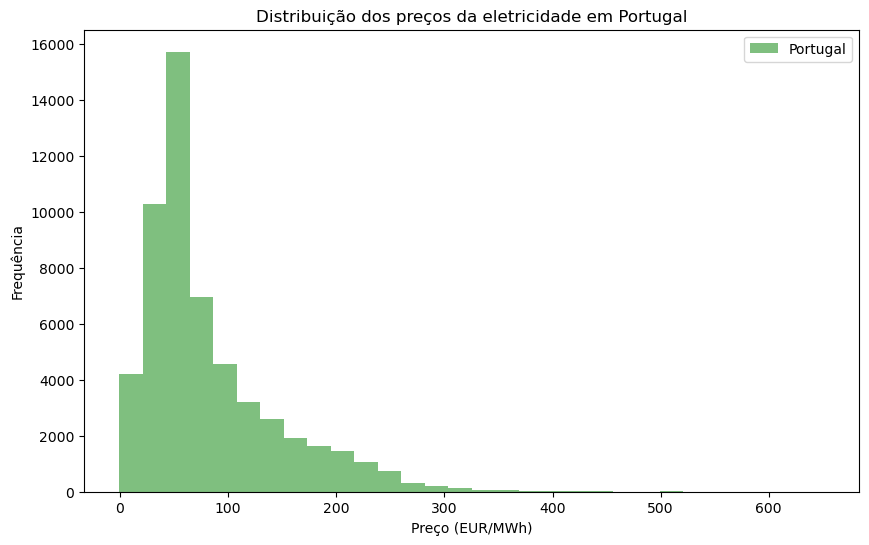

In [4]:
# Histograma dos preços na Espanha
plt.figure(figsize=(10, 6))
plt.hist(df['Preço marginal Espanha (EUR/MWh)'], bins=30, color='blue', alpha=0.5, label='Espanha')
plt.title('Distribuição dos preços da eletricidade na Espanha')
plt.xlabel('Preço (EUR/MWh)')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Histograma dos preços em Portugal
plt.figure(figsize=(10, 6))
plt.hist(df['Preço marginal Portugal (EUR/MWh)'], bins=30, color='green', alpha=0.5, label='Portugal')
plt.title('Distribuição dos preços da eletricidade em Portugal')
plt.xlabel('Preço (EUR/MWh)')
plt.ylabel('Frequência')
plt.legend()
plt.show()

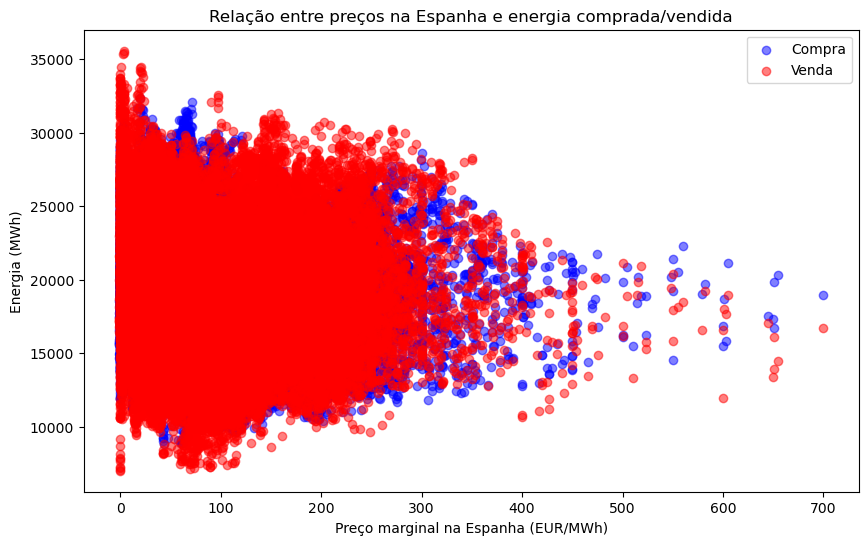

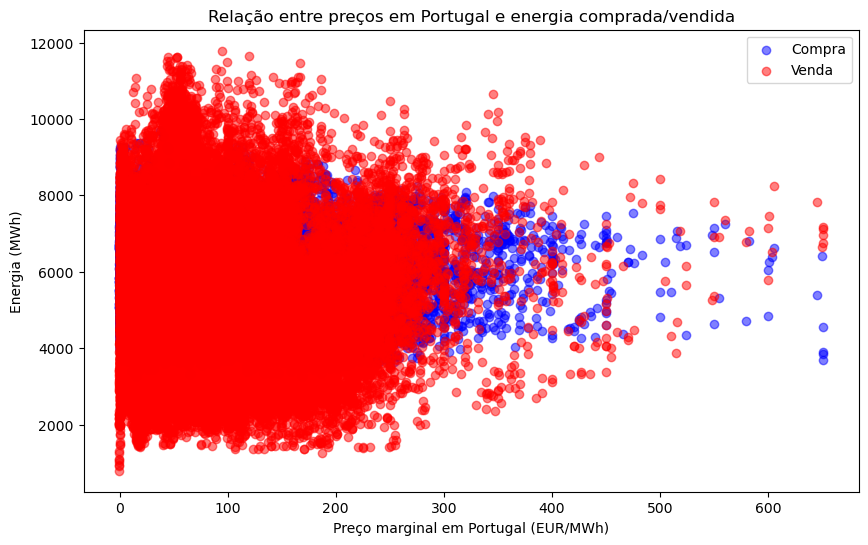

In [5]:
# Relação entre preços na Espanha e quantidade de energia comprada e vendida
plt.figure(figsize=(10, 6))
plt.scatter(df['Preço marginal Espanha (EUR/MWh)'], df['Energia Total de compra Espanha (MWh)'], color='blue', alpha=0.5, label='Compra')
plt.scatter(df['Preço marginal Espanha (EUR/MWh)'], df['Energia Total de venda Espanha (MWh)'], color='red', alpha=0.5, label='Venda')
plt.title('Relação entre preços na Espanha e energia comprada/vendida')
plt.xlabel('Preço marginal na Espanha (EUR/MWh)')
plt.ylabel('Energia (MWh)')
plt.legend()
plt.show()

# Relação entre preços em Portugal e quantidade de energia comprada e vendida
plt.figure(figsize=(10, 6))
plt.scatter(df['Preço marginal Portugal (EUR/MWh)'], df['Energia Total de compra Portugal (MWh)'], color='blue', alpha=0.5, label='Compra')
plt.scatter(df['Preço marginal Portugal (EUR/MWh)'], df['Energia Total de venda Portugal (MWh)'], color='red', alpha=0.5, label='Venda')
plt.title('Relação entre preços em Portugal e energia comprada/vendida')
plt.xlabel('Preço marginal em Portugal (EUR/MWh)')
plt.ylabel('Energia (MWh)')
plt.legend()
plt.show()

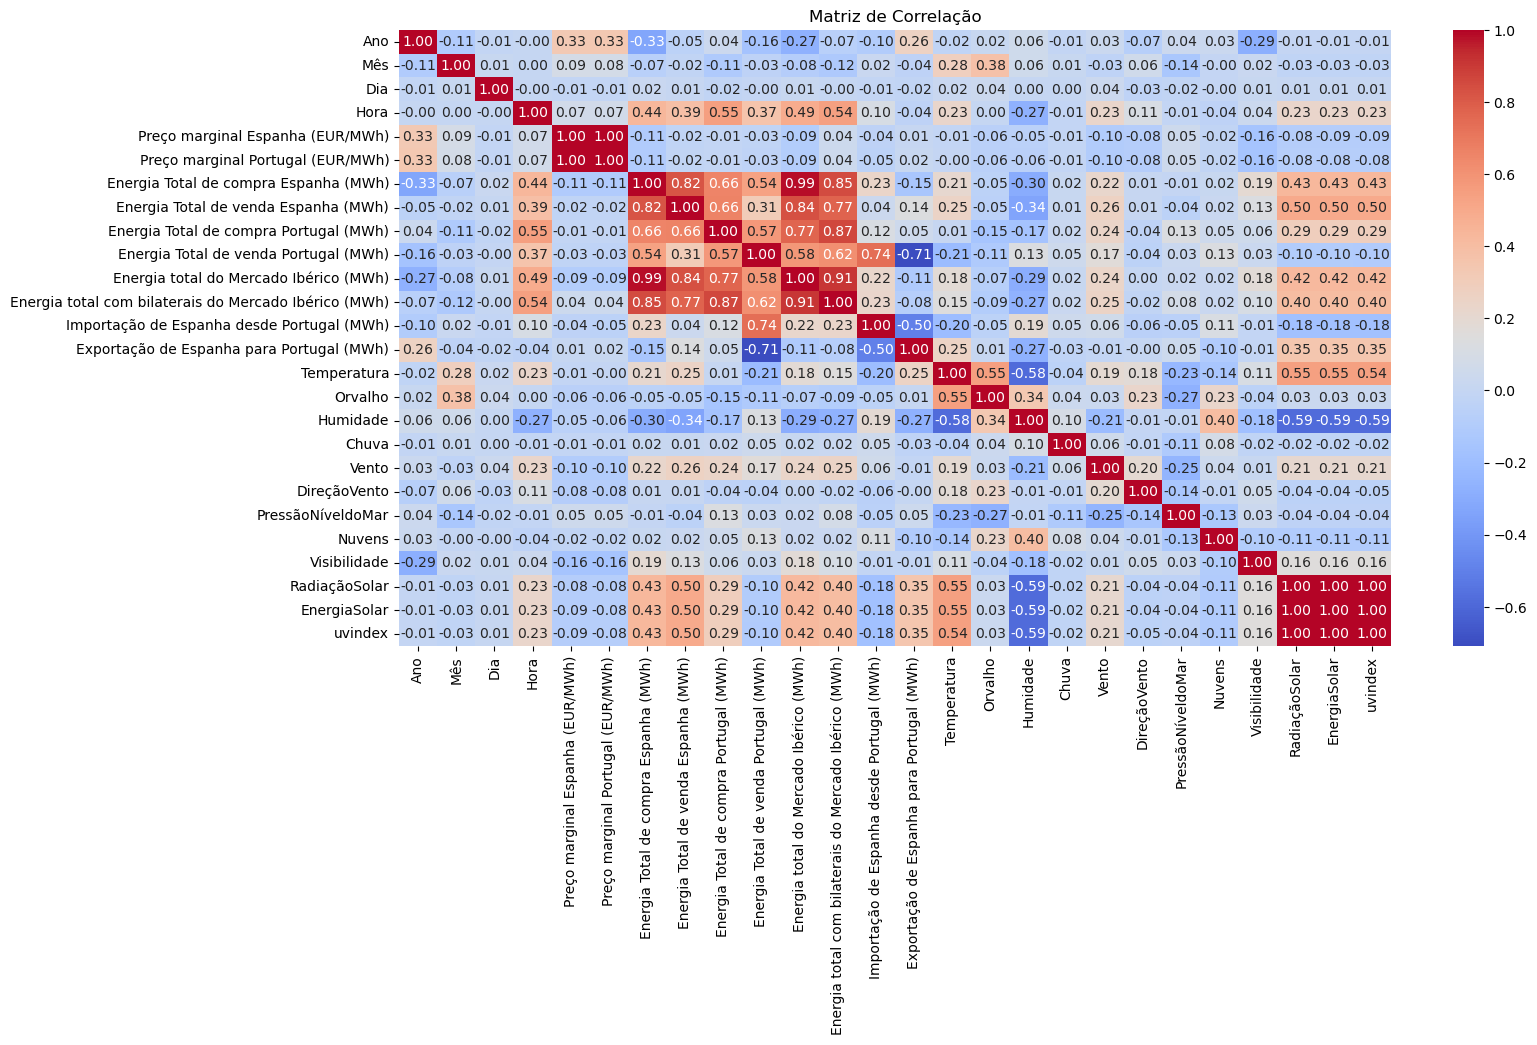

In [6]:
import seaborn as sns

# Calcular a matriz de correlação entre as variáveis numéricas
corr_matrix = df.corr()

# Plot da matriz de correlação usando um heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [7]:
def mapear_estacao(mes):
    if mes in [12, 1, 2]:
        return 'Inverno'
    elif mes in [3, 4, 5]:
        return 'Primavera'
    elif mes in [6, 7, 8]:
        return 'Verão'
    else:
        return 'Outono'
    
# Extrair características da data e hora
df['Dia_da_semana'] = df['Dia'].apply(lambda x: pd.to_datetime(x, format='%d').dayofweek)
df['Periodo_do_dia'] = pd.cut(df['Hora'], bins=[0, 6, 12, 18, 24], labels=['Madrugada', 'Manhã', 'Tarde', 'Noite'], right=False)
# Adicionar uma nova coluna para a estação do ano
df['Estação'] = df['Mês'].apply(mapear_estacao)


In [8]:
# Visualizar as primeiras linhas do DataFrame com as novas características
print(df.head(5))

    Ano  Mês  Dia  Hora  Preço marginal Espanha (EUR/MWh)  \
0  2018    1    1     1                              6.74   
1  2018    1    1     2                              4.74   
2  2018    1    1     3                              3.66   
3  2018    1    1     4                              2.30   
4  2018    1    1     5                              2.30   

   Preço marginal Portugal (EUR/MWh)  Energia Total de compra Espanha (MWh)  \
0                               28.1                                17596.0   
1                               33.0                                16527.1   
2                               32.9                                15702.5   
3                               28.1                                15288.2   
4                               27.6                                14938.7   

   Energia Total de venda Espanha (MWh)  \
0                               19028.2   
1                               17662.1   
2                            

In [9]:
# Verificar informações sobre os dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55271 entries, 0 to 55270
Data columns (total 29 columns):
 #   Column                                                 Non-Null Count  Dtype   
---  ------                                                 --------------  -----   
 0   Ano                                                    55271 non-null  int64   
 1   Mês                                                    55271 non-null  int64   
 2   Dia                                                    55271 non-null  int64   
 3   Hora                                                   55271 non-null  int64   
 4   Preço marginal Espanha (EUR/MWh)                       55271 non-null  float64 
 5   Preço marginal Portugal (EUR/MWh)                      55271 non-null  float64 
 6   Energia Total de compra Espanha (MWh)                  55271 non-null  float64 
 7   Energia Total de venda Espanha (MWh)                   55271 non-null  float64 
 8   Energia Total de compra Portugal (MW

In [10]:
# Criar variáveis dummy para 'Periodo_do_dia' e 'Estação'
df = pd.get_dummies(df, columns=['Periodo_do_dia', 'Estação'])

# Verificar as primeiras linhas do DataFrame após a adição das variáveis dummy
print(df.head())


    Ano  Mês  Dia  Hora  Preço marginal Espanha (EUR/MWh)  \
0  2018    1    1     1                              6.74   
1  2018    1    1     2                              4.74   
2  2018    1    1     3                              3.66   
3  2018    1    1     4                              2.30   
4  2018    1    1     5                              2.30   

   Preço marginal Portugal (EUR/MWh)  Energia Total de compra Espanha (MWh)  \
0                               28.1                                17596.0   
1                               33.0                                16527.1   
2                               32.9                                15702.5   
3                               28.1                                15288.2   
4                               27.6                                14938.7   

   Energia Total de venda Espanha (MWh)  \
0                               19028.2   
1                               17662.1   
2                            

In [11]:
# Calcular a média móvel dos preços da eletricidade para as últimas 3 horas
df['Media_movel_3h'] = df['Preço marginal Portugal (EUR/MWh)'].rolling(window=3, min_periods=1).mean()
# Calcular o volume diário de compra e venda
df['Volume_compra_diaria'] = df.groupby(['Ano', 'Mês', 'Dia'])['Energia Total de compra Portugal (MWh)'].transform('sum')
df['Volume_venda_diaria'] = df.groupby(['Ano', 'Mês', 'Dia'])['Energia Total de venda Portugal (MWh)'].transform('sum')
# Adicionar a característica de preço da hora anterior
df['Preço_anterior'] = df['Preço marginal Portugal (EUR/MWh)'].shift(1)
# Preencher o primeiro valor NaN com o valor da hora atual
df['Preço_anterior'].fillna(df['Preço marginal Portugal (EUR/MWh)'], inplace=True)
# Criar uma coluna de data combinando Ano, Mês, Dia e Hora
df['Data'] = pd.to_datetime(df[['Ano', 'Mês', 'Dia', 'Hora']].rename(columns={'Ano': 'year', 'Mês': 'month', 'Dia': 'day', 'Hora': 'hour'}))

# Visualizar as linhas do DataFrame com as novas características de volume
print(df.head(5))

    Ano  Mês  Dia  Hora  Preço marginal Espanha (EUR/MWh)  \
0  2018    1    1     1                              6.74   
1  2018    1    1     2                              4.74   
2  2018    1    1     3                              3.66   
3  2018    1    1     4                              2.30   
4  2018    1    1     5                              2.30   

   Preço marginal Portugal (EUR/MWh)  Energia Total de compra Espanha (MWh)  \
0                               28.1                                17596.0   
1                               33.0                                16527.1   
2                               32.9                                15702.5   
3                               28.1                                15288.2   
4                               27.6                                14938.7   

   Energia Total de venda Espanha (MWh)  \
0                               19028.2   
1                               17662.1   
2                            

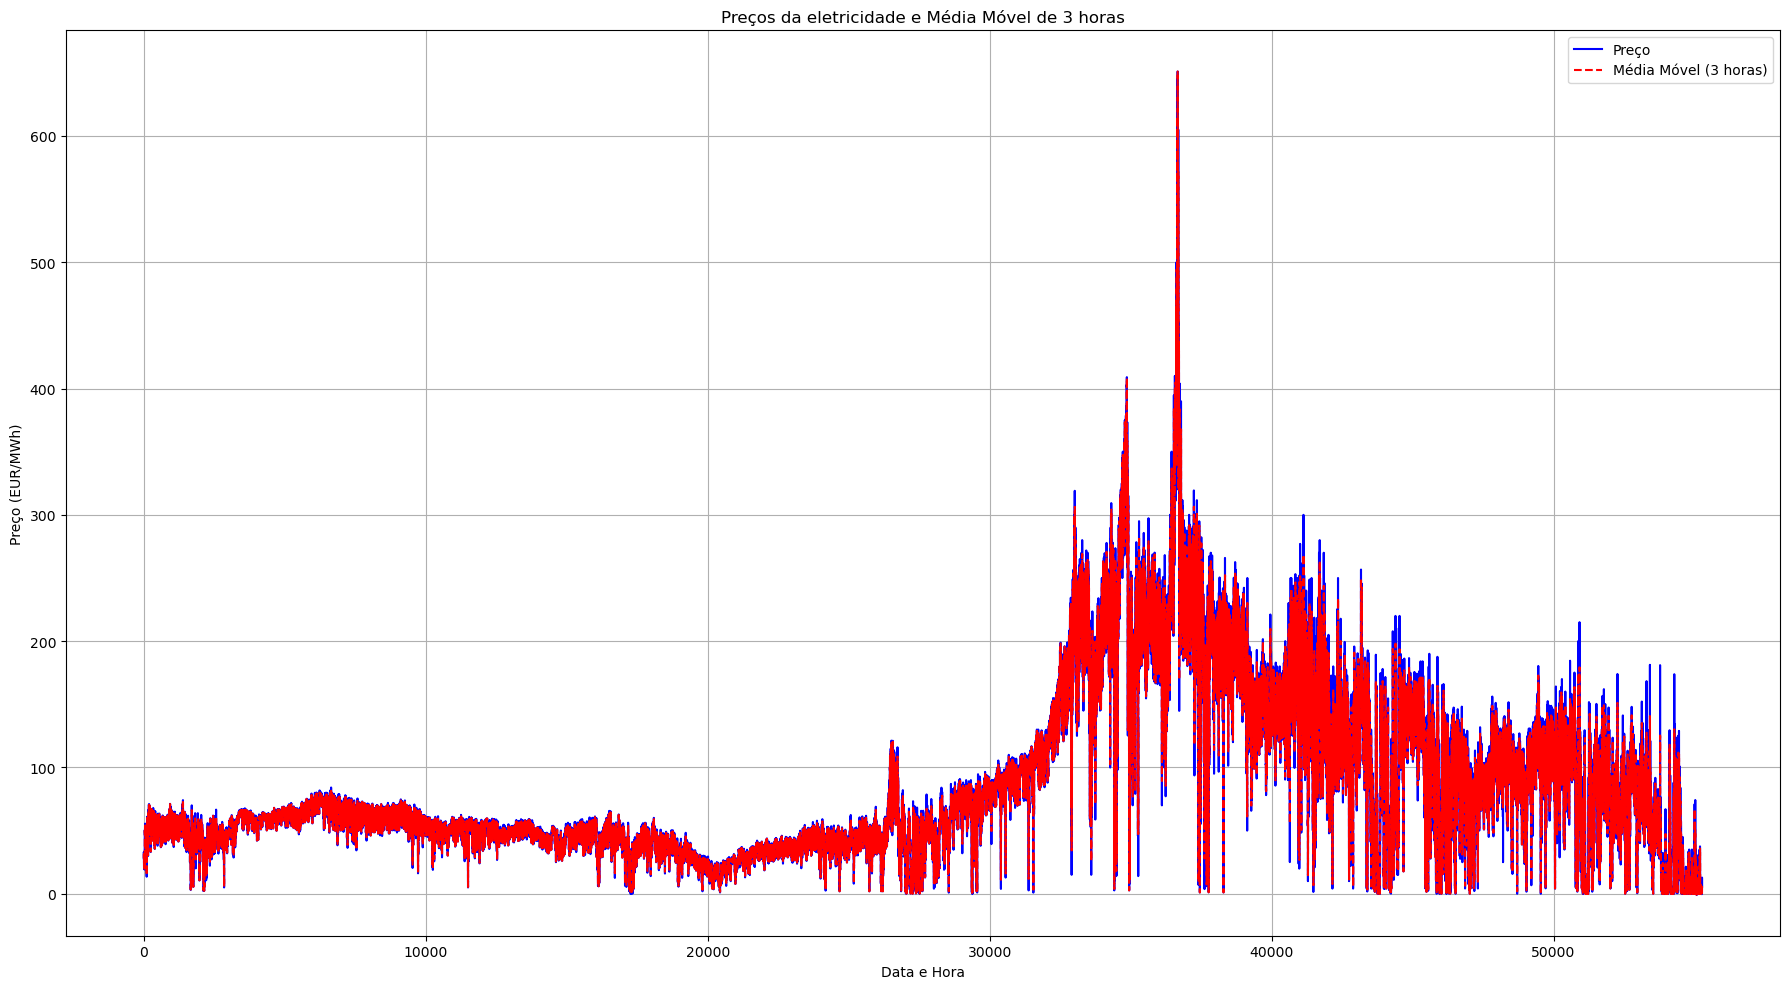

In [12]:
# Plot dos preços da eletricidade e a média móvel de 3 horas
plt.figure(figsize=(18, 10))
plt.plot(df.index, df['Preço marginal Portugal (EUR/MWh)'], color='blue', label='Preço')
plt.plot(df.index, df['Media_movel_3h'], color='red', linestyle='--', label='Média Móvel (3 horas)')
plt.title('Preços da eletricidade e Média Móvel de 3 horas')
plt.xlabel('Data e Hora')
plt.ylabel('Preço (EUR/MWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

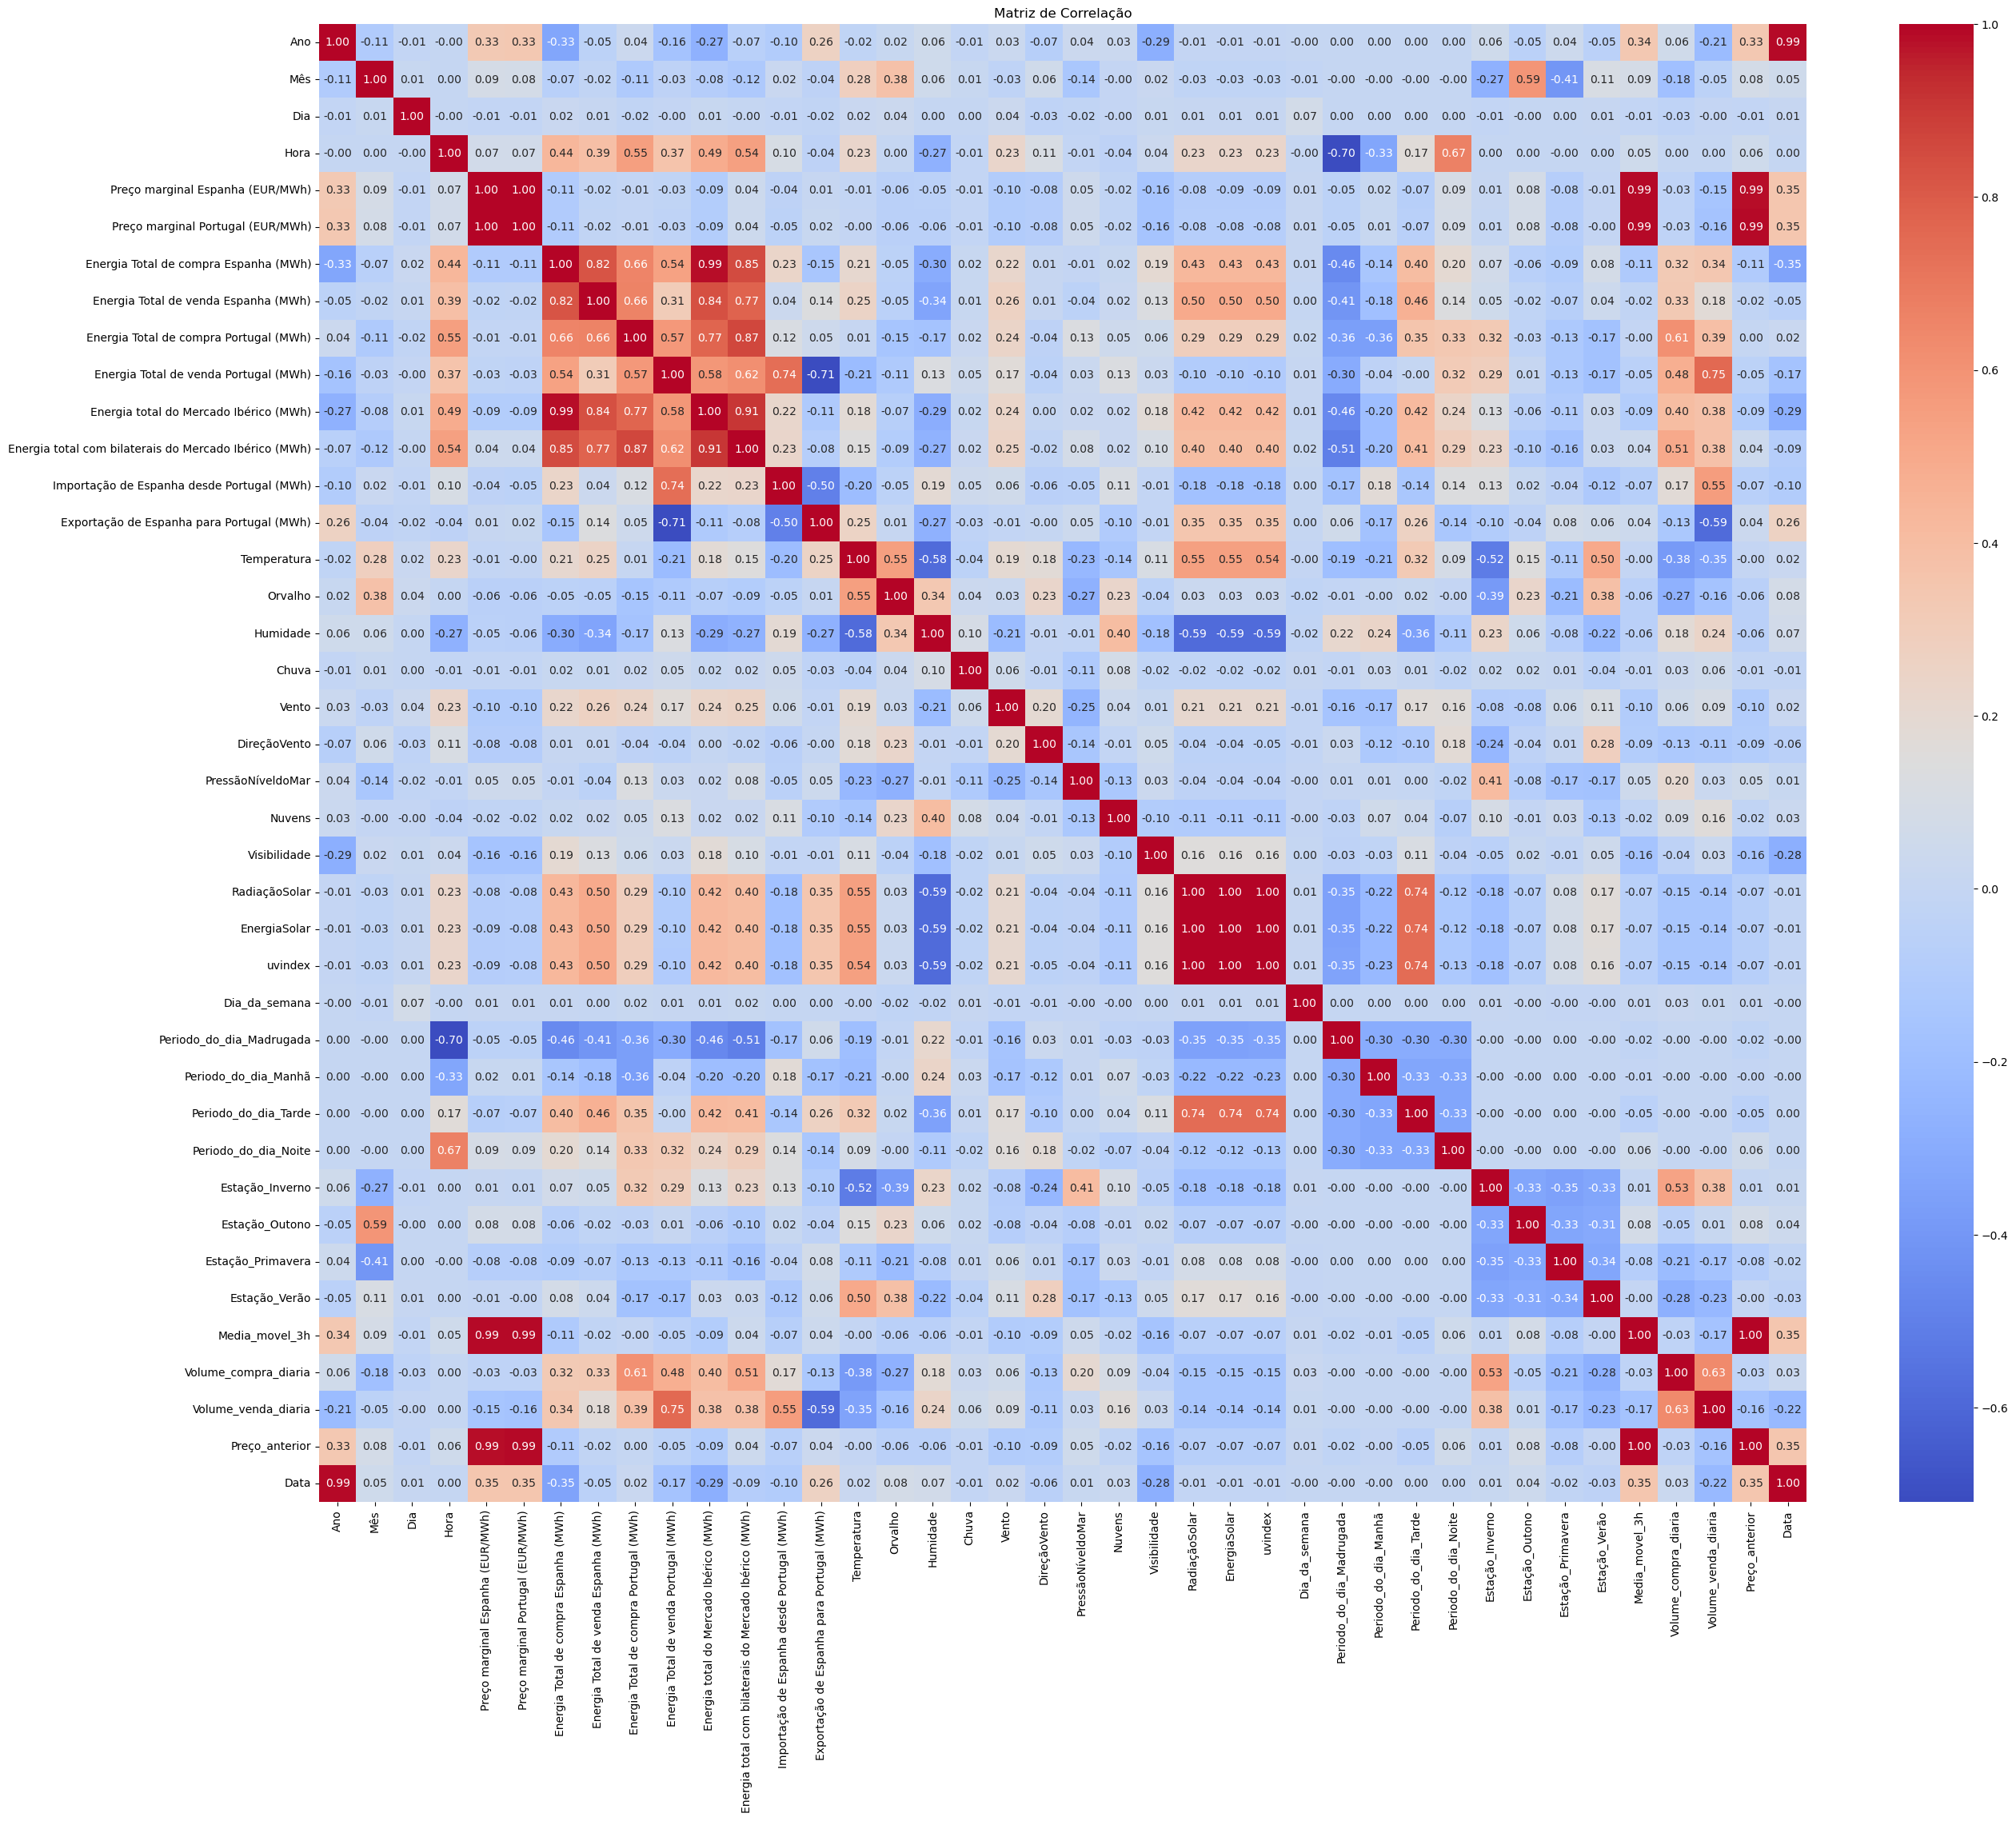

In [13]:
# Calcular a matriz de correlação entre as variáveis numéricas
corr_matrix = df.corr()

# Plotar a matriz de correlação usando um mapa de calor
plt.figure(figsize=(30, 24))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [14]:
def print_correlation_with_target(corr_matrix, target_variable):
    # Identificar as correlações mais fortes com a variável alvo
    target_correlations = corr_matrix[target_variable].sort_values(ascending=False)
    print("Correlações com", target_variable, ":")
    print(target_correlations)

print_correlation_with_target(corr_matrix, 'Preço marginal Portugal (EUR/MWh)')


Correlações com Preço marginal Portugal (EUR/MWh) :
Preço marginal Portugal (EUR/MWh)                        1.000000
Preço marginal Espanha (EUR/MWh)                         0.997913
Media_movel_3h                                           0.991229
Preço_anterior                                           0.988076
Data                                                     0.349723
Ano                                                      0.334855
Periodo_do_dia_Noite                                     0.090988
Mês                                                      0.084704
Estação_Outono                                           0.078735
Hora                                                     0.068743
PressãoNíveldoMar                                        0.048140
Energia total com bilaterais do Mercado Ibérico (MWh)    0.043377
Exportação de Espanha para Portugal (MWh)                0.016568
Periodo_do_dia_Manhã                                     0.012544
Dia_da_semana           

In [15]:
# Selecionar apenas as colunas numéricas
numeric_columns = df.select_dtypes(include=['number'])

# Calcular a matriz de correlação
corr_matrix = numeric_columns.corr()

# Criar uma lista para armazenar as informações sobre correlações
correlation_info = []

# Iterar sobre as colunas da matriz de correlação
for column in corr_matrix.columns:
    # Obter as correlações com a coluna atual
    correlations = corr_matrix[column]
    # Filtrar as correlações que são diferentes de 1 (correlação da variável com ela mesma)
    relevant_correlations = correlations[correlations.index != column]
    # Converter as correlações em uma lista de tuplas (variável, correlação)
    correlation_tuples = [(index, correlation) for index, correlation in relevant_correlations.items()]
    # Ordenar as correlações pelo valor absoluto
    correlation_tuples.sort(key=lambda x: abs(x[1]), reverse=True)
    # Adicionar as informações sobre correlações à lista
    correlation_info.append((column, correlation_tuples))

# Imprimir as informações sobre correlações em formato de texto
for column, correlations in correlation_info:
    print(f"Correlações com {column} :")
    for correlation in correlations:
        print(f"{correlation[0]:<50}: {correlation[1]:.4f}")
    print()

Correlações com Ano :
Media_movel_3h                                    : 0.3370
Preço_anterior                                    : 0.3349
Preço marginal Portugal (EUR/MWh)                 : 0.3349
Energia Total de compra Espanha (MWh)             : -0.3338
Preço marginal Espanha (EUR/MWh)                  : 0.3313
Visibilidade                                      : -0.2869
Energia total do Mercado Ibérico (MWh)            : -0.2730
Exportação de Espanha para Portugal (MWh)         : 0.2641
Volume_venda_diaria                               : -0.2144
Energia Total de venda Portugal (MWh)             : -0.1618
Mês                                               : -0.1067
Importação de Espanha desde Portugal (MWh)        : -0.0999
DireçãoVento                                      : -0.0689
Energia total com bilaterais do Mercado Ibérico (MWh): -0.0671
Volume_compra_diaria                              : 0.0598
Humidade                                          : 0.0580
Energia Total de venda

In [16]:
# Estatísticas descritivas dos preços da eletricidade
preco_stats_pt = df['Preço marginal Portugal (EUR/MWh)'].describe()
preco_stats_es = df['Preço marginal Espanha (EUR/MWh)'].describe()

print(preco_stats_pt)
print(preco_stats_es)

count    55271.000000
mean        82.209234
std         63.916817
min         -0.630000
25%         41.940000
50%         60.160000
75%        106.000000
max        651.000000
Name: Preço marginal Portugal (EUR/MWh), dtype: float64
count    55271.000000
mean        81.914524
std         64.061626
min         -1.500000
25%         41.620000
50%         60.000000
75%        105.875000
max        700.000000
Name: Preço marginal Espanha (EUR/MWh), dtype: float64


# Análise da Série Temporal Completa:

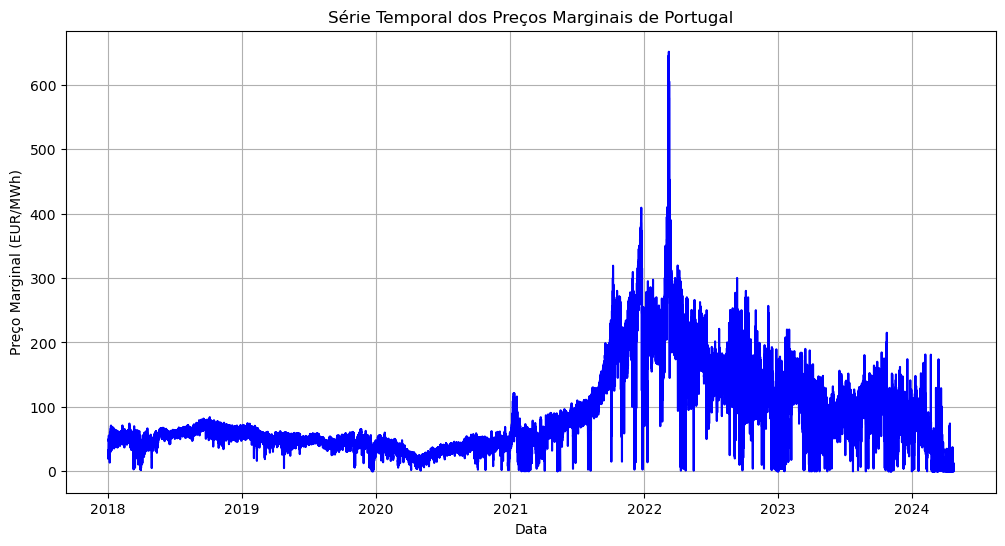

In [17]:
import matplotlib.pyplot as plt

# Criar a série temporal dos preços marginais de Portugal
serie_temporal = df[['Data']].copy()
serie_temporal['Preço Marginal (EUR/MWh)'] = df['Preço marginal Portugal (EUR/MWh)']

# Plotar a série temporal
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal['Data'], serie_temporal['Preço Marginal (EUR/MWh)'], color='blue')
plt.title('Série Temporal dos Preços Marginais de Portugal')
plt.xlabel('Data')
plt.ylabel('Preço Marginal (EUR/MWh)')
plt.grid(True)
plt.show()


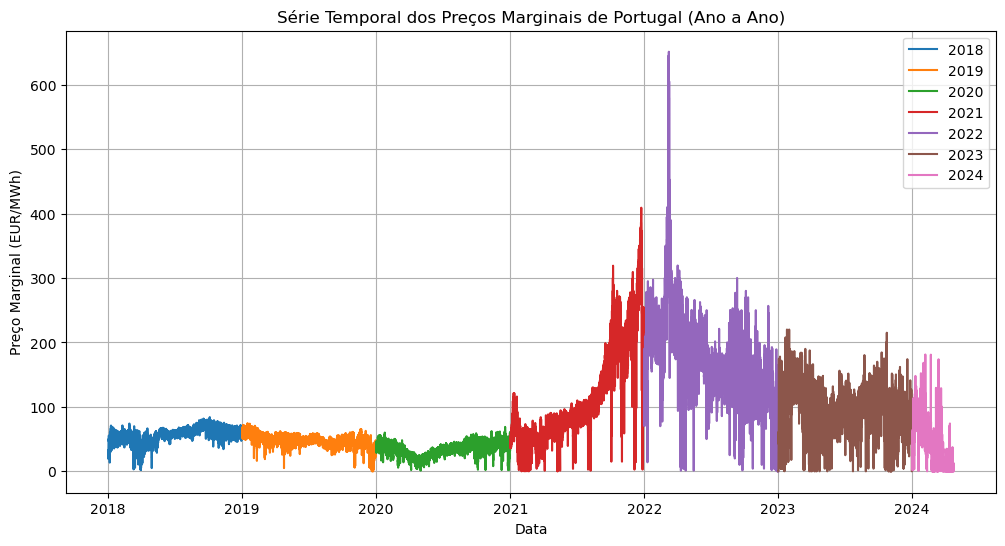

In [18]:
import matplotlib.pyplot as plt

# Dividir os dados por ano
anos = sorted(df['Ano'].unique())

# Plotar a série temporal para cada ano
plt.figure(figsize=(12, 6))
for ano in anos:
    dados_ano = df[df['Ano'] == ano]
    plt.plot(dados_ano['Data'], dados_ano['Preço marginal Portugal (EUR/MWh)'], label=ano)

plt.title('Série Temporal dos Preços Marginais de Portugal (Ano a Ano)')
plt.xlabel('Data')
plt.ylabel('Preço Marginal (EUR/MWh)')
plt.legend()
plt.grid(True)
plt.show()


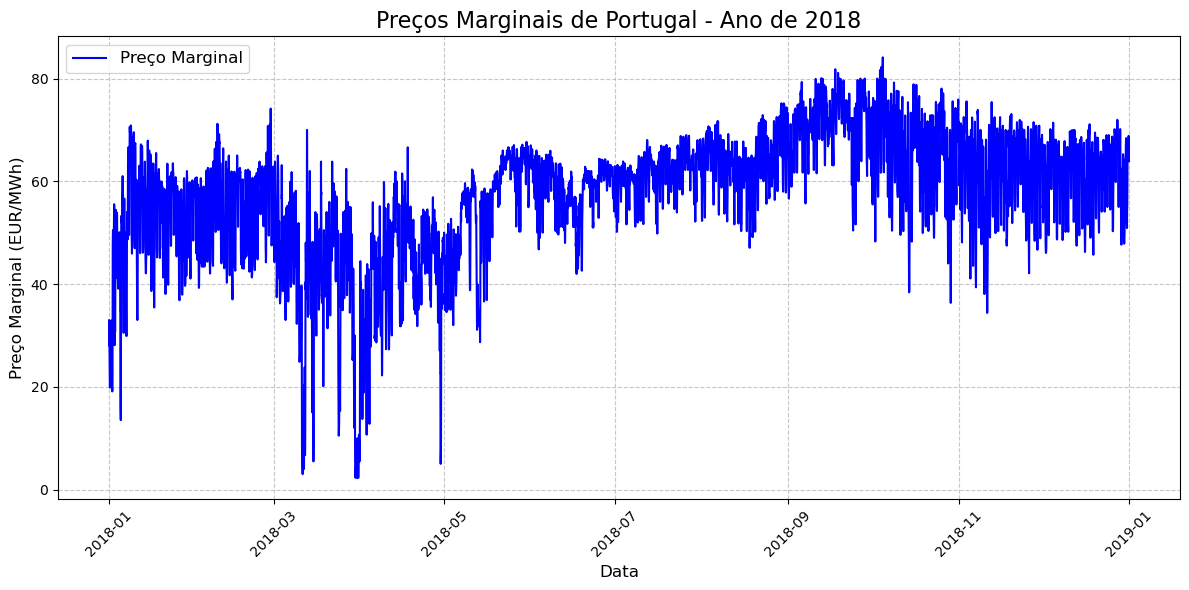

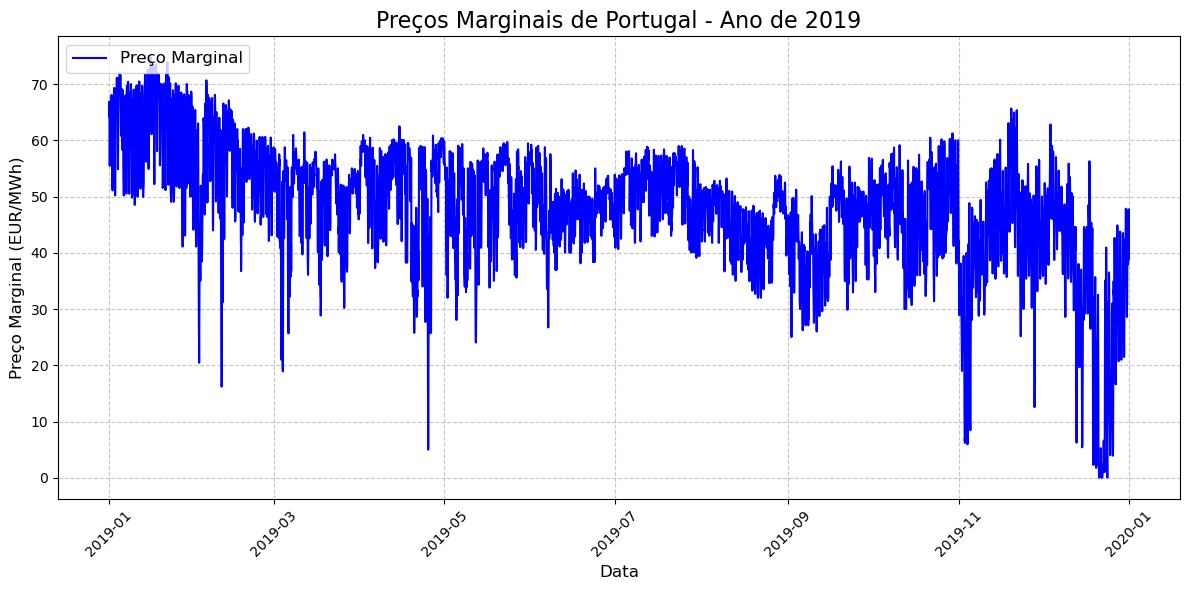

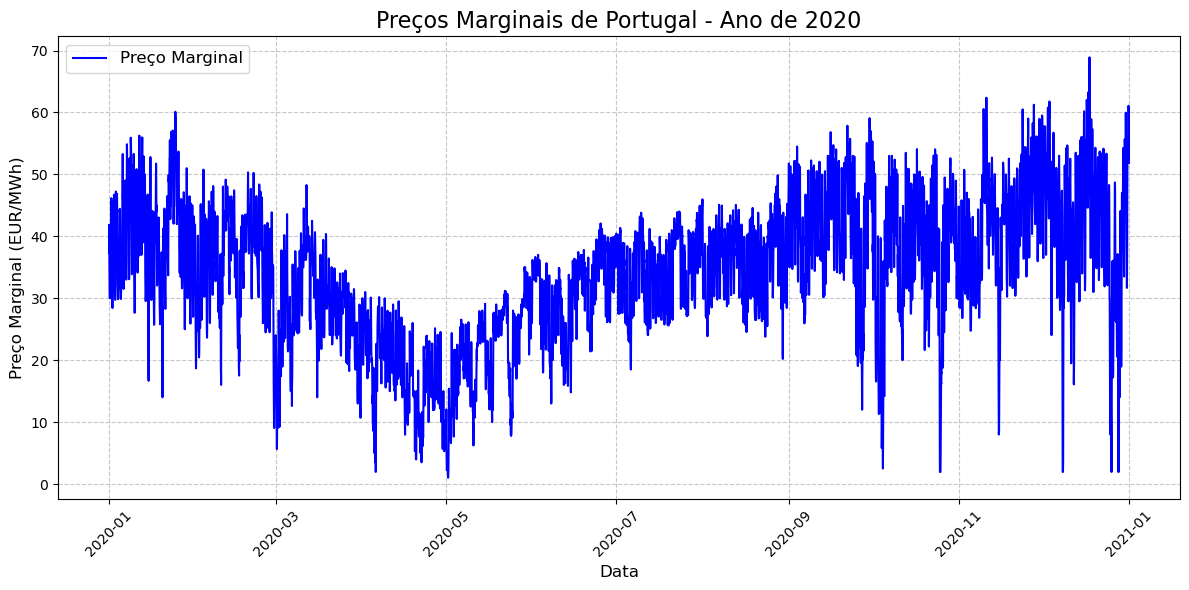

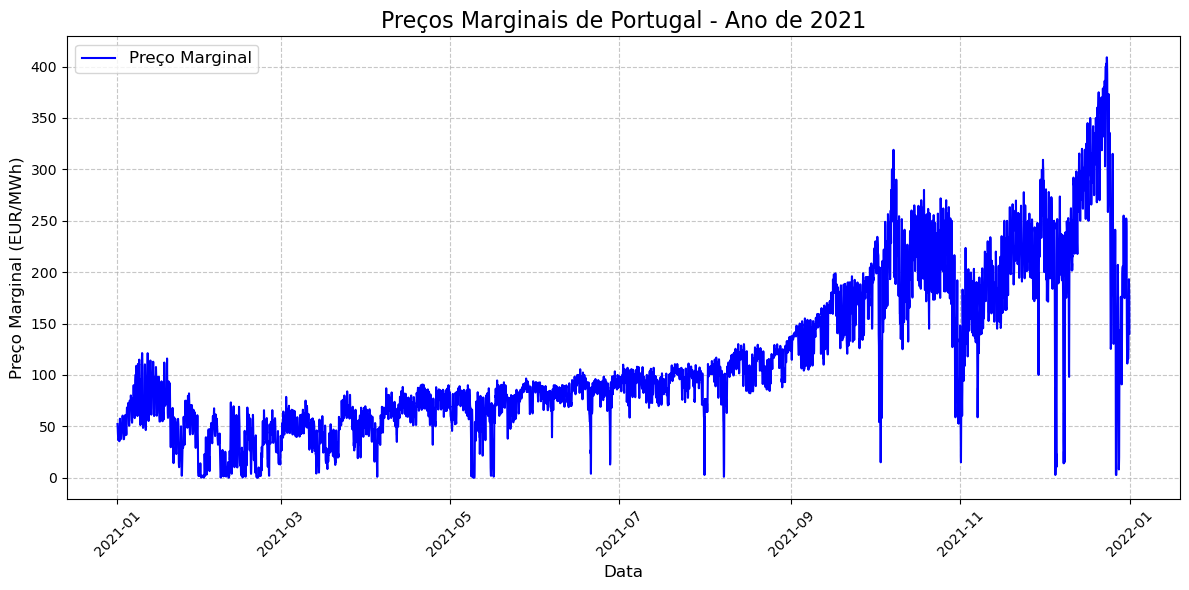

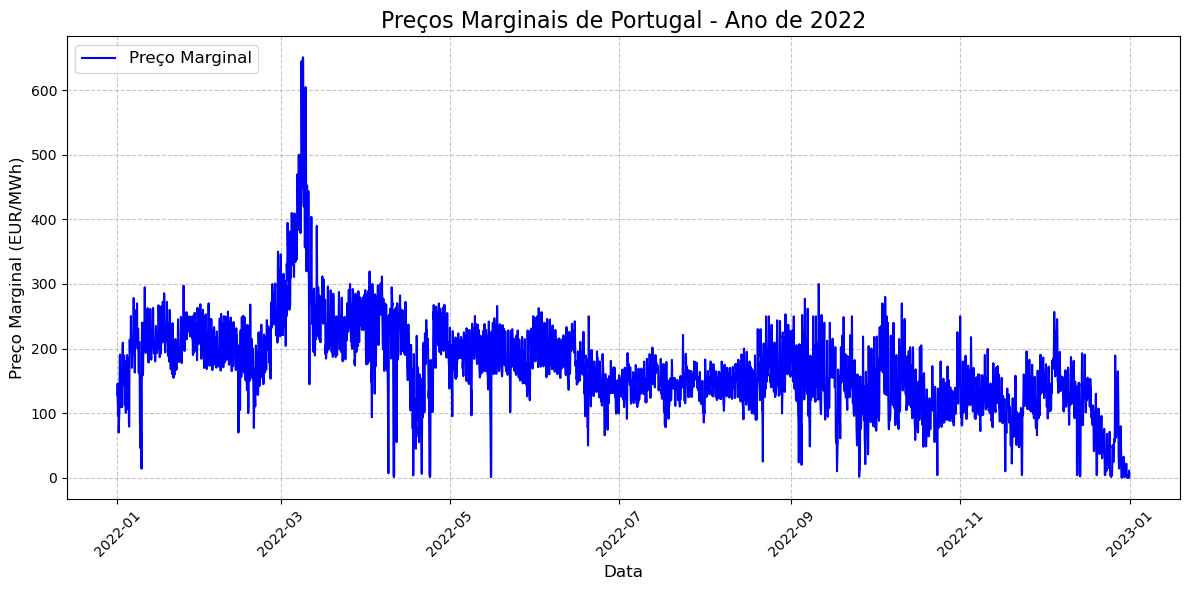

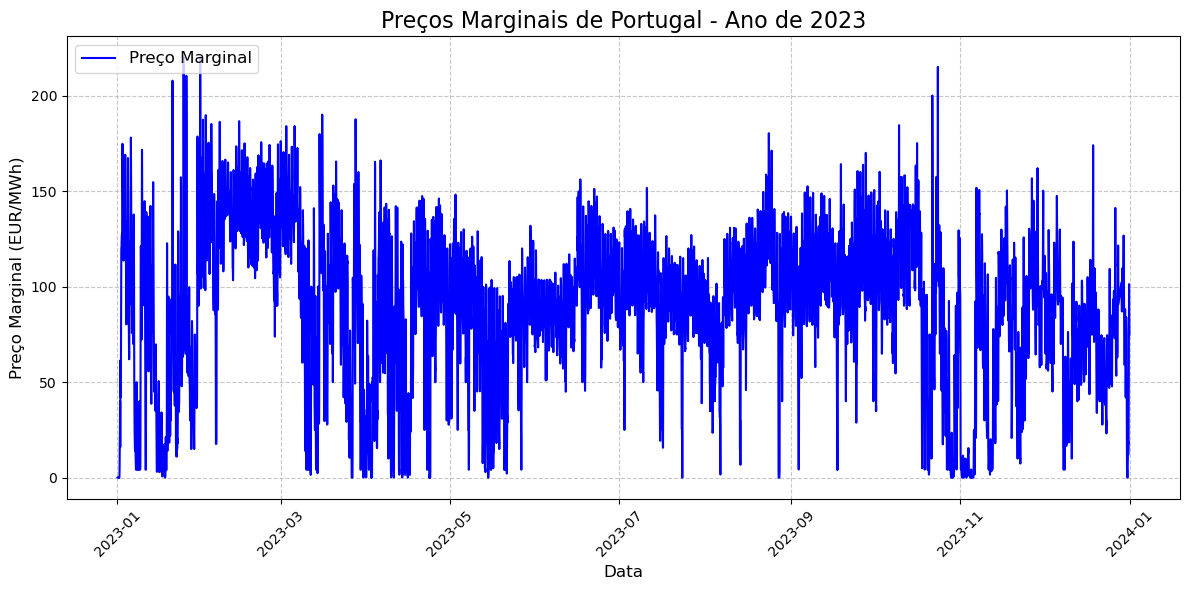

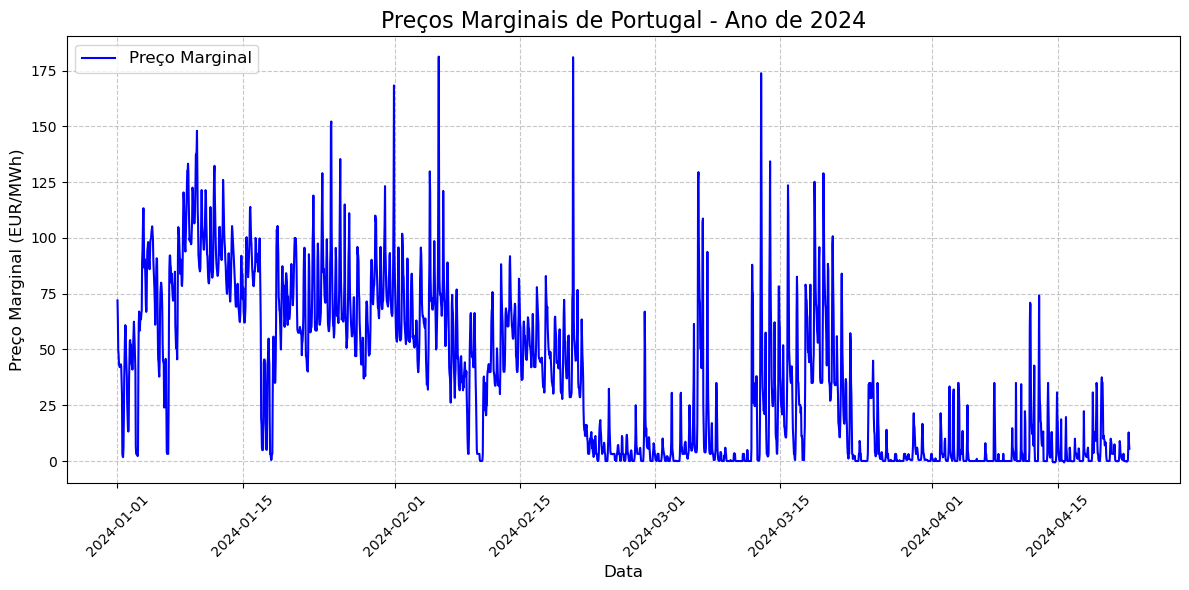

In [19]:
# Iterar sobre os anos de 2018 a 2024
for year in range(2018, 2025):
    # Filtrar os dados para incluir apenas o ano atual
    df_year = df[df['Data'].dt.year == year]

    # Plotar os preços marginais de Portugal para o ano atual
    plt.figure(figsize=(12, 6))
    plt.plot(df_year['Data'], df_year['Preço marginal Portugal (EUR/MWh)'], color='blue', linewidth=1.5, label='Preço Marginal')
    plt.title(f'Preços Marginais de Portugal - Ano de {year}', fontsize=16)
    plt.xlabel('Data', fontsize=12)
    plt.ylabel('Preço Marginal (EUR/MWh)', fontsize=12)
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10)
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

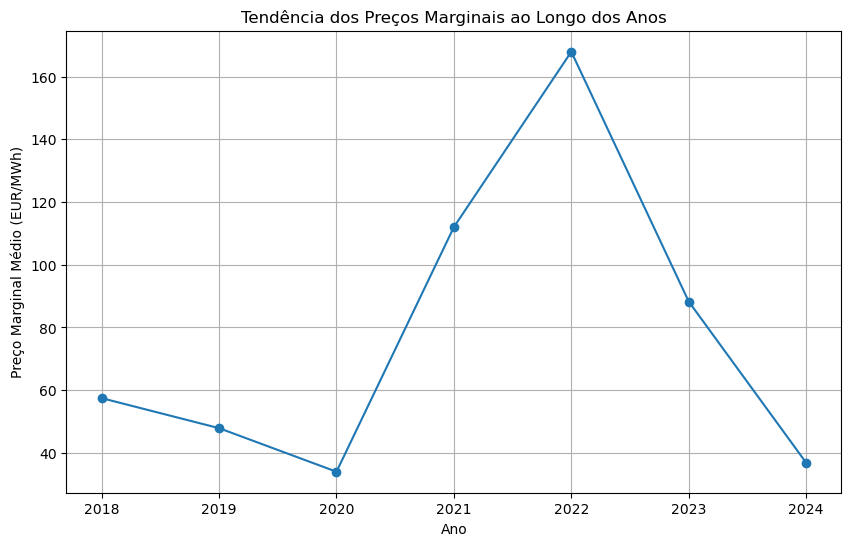

In [20]:
# Extrair ano dos dados
df['Ano'] = df['Data'].dt.year

# Calcular média dos preços marginais por ano
media_preco_por_ano = df.groupby('Ano')['Preço marginal Portugal (EUR/MWh)'].mean()

# Plotar a tendência dos preços marginais ao longo dos anos
plt.figure(figsize=(10, 6))
plt.plot(media_preco_por_ano.index, media_preco_por_ano.values, marker='o', linestyle='-')
plt.title('Tendência dos Preços Marginais ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Preço Marginal Médio (EUR/MWh)')
plt.grid(True)
plt.show()


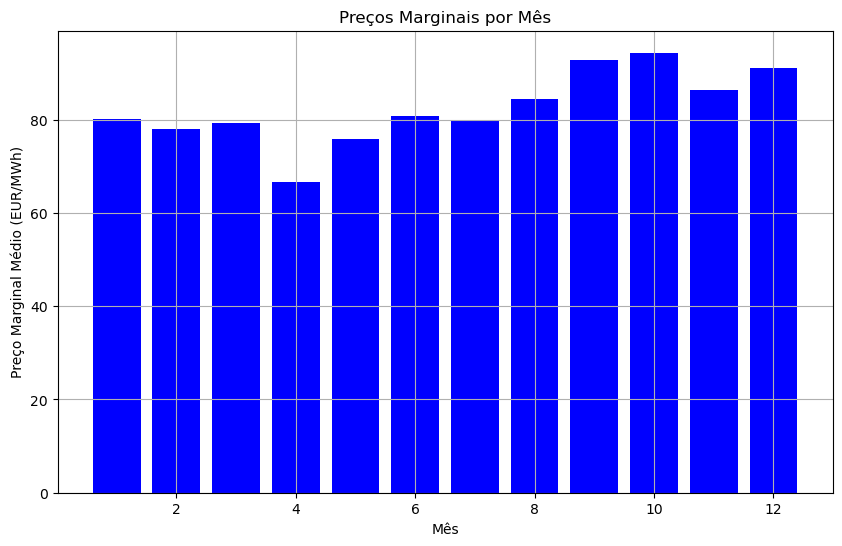

In [21]:
# Extrair mês dos dados
df['Mês'] = df['Data'].dt.month

# Calcular média dos preços marginais por mês
media_preco_por_mes = df.groupby('Mês')['Preço marginal Portugal (EUR/MWh)'].mean()

# Plotar os preços marginais por mês
plt.figure(figsize=(10, 6))
plt.bar(media_preco_por_mes.index, media_preco_por_mes.values, color='blue')
plt.title('Preços Marginais por Mês')
plt.xlabel('Mês')
plt.ylabel('Preço Marginal Médio (EUR/MWh)')
plt.grid(True)
plt.show()


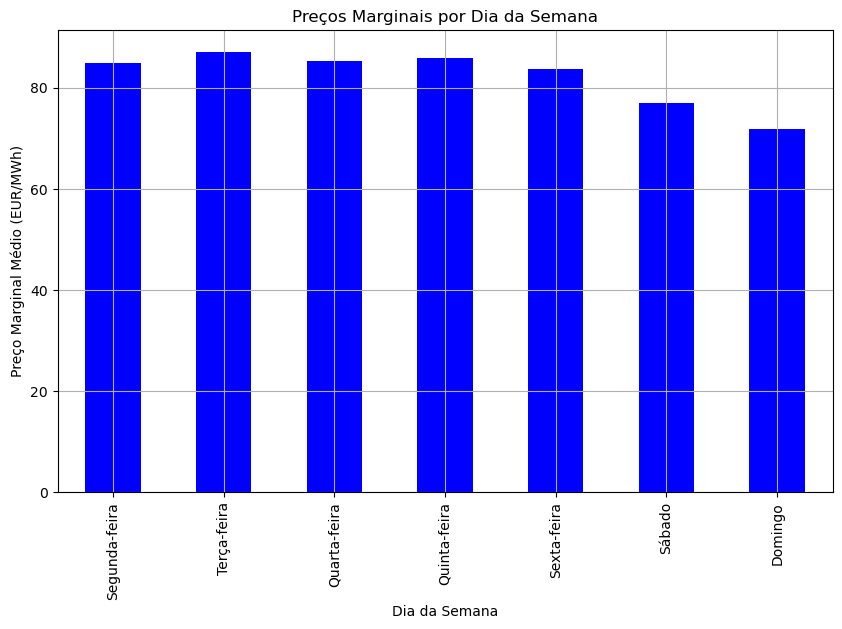

In [22]:
# Extrair dia da semana dos dados
df['Dia_da_semana'] = df['Data'].dt.dayofweek

# Mapear números dos dias da semana para os nomes
dias_semana = {0: 'Segunda-feira', 1: 'Terça-feira', 2: 'Quarta-feira', 3: 'Quinta-feira', 4: 'Sexta-feira', 5: 'Sábado', 6: 'Domingo'}

# Calcular média dos preços marginais por dia da semana
media_preco_por_dia_semana = df.groupby('Dia_da_semana')['Preço marginal Portugal (EUR/MWh)'].mean().rename(dias_semana)

# Plotar os preços marginais por dia da semana
plt.figure(figsize=(10, 6))
media_preco_por_dia_semana.plot(kind='bar', color='blue')
plt.title('Preços Marginais por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Preço Marginal Médio (EUR/MWh)')
plt.grid(True)
plt.show()


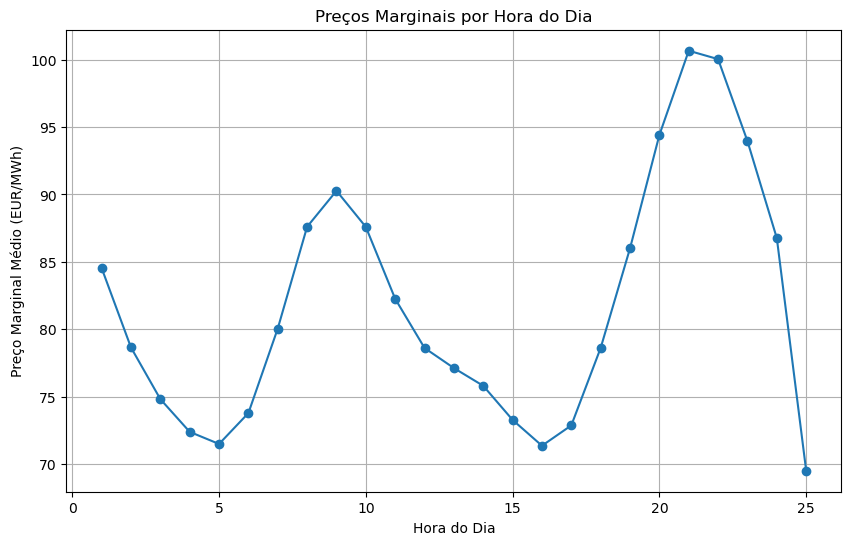

In [23]:
# Calcular média dos preços marginais por hora do dia
media_preco_por_hora = df.groupby('Hora')['Preço marginal Portugal (EUR/MWh)'].mean()

# Plotar os preços marginais por hora do dia
plt.figure(figsize=(10, 6))
plt.plot(media_preco_por_hora.index, media_preco_por_hora.values, marker='o', linestyle='-')
plt.title('Preços Marginais por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Preço Marginal Médio (EUR/MWh)')
plt.grid(True)
plt.show()


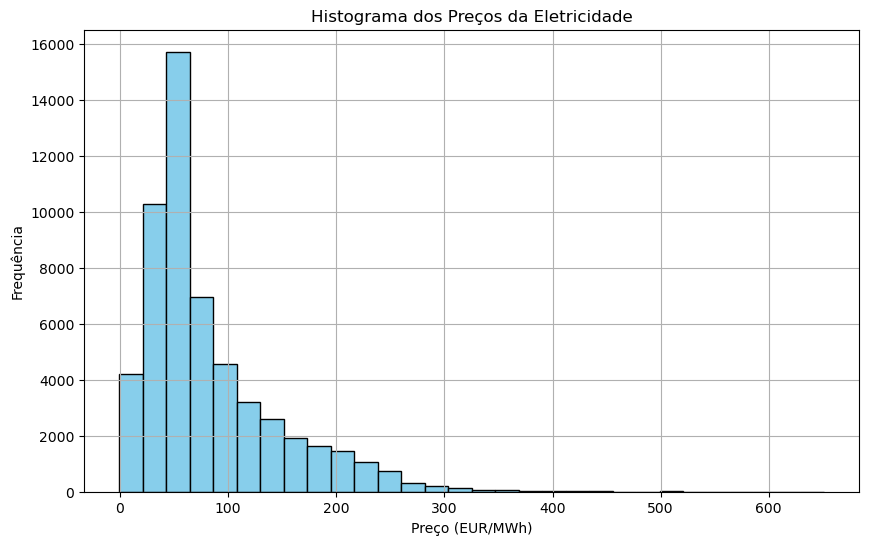

In [24]:
# Plotar o histograma dos preços da eletricidade
plt.figure(figsize=(10, 6))
plt.hist(df['Preço marginal Portugal (EUR/MWh)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma dos Preços da Eletricidade')
plt.xlabel('Preço (EUR/MWh)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


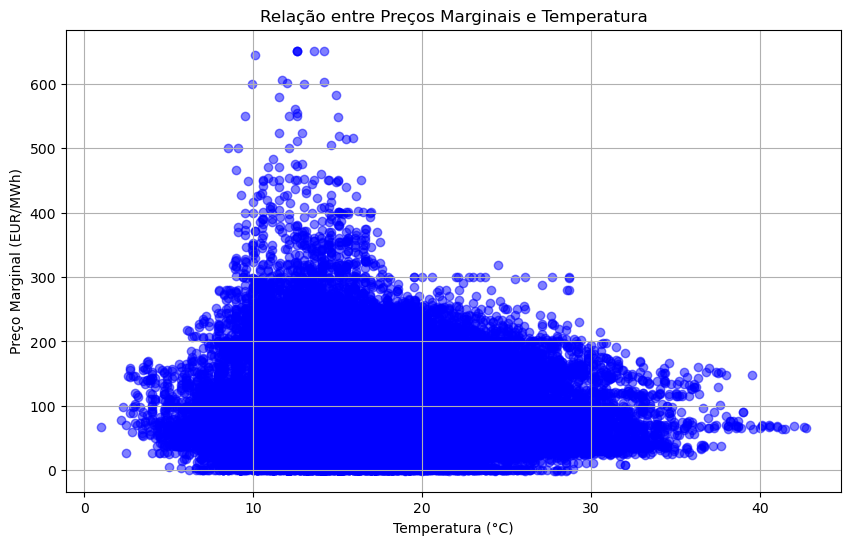

In [25]:
# Plotar o scatter plot da temperatura em relação aos preços marginais
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperatura'], df['Preço marginal Portugal (EUR/MWh)'], color='blue', alpha=0.5)
plt.title('Relação entre Preços Marginais e Temperatura')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Preço Marginal (EUR/MWh)')
plt.grid(True)
plt.show()


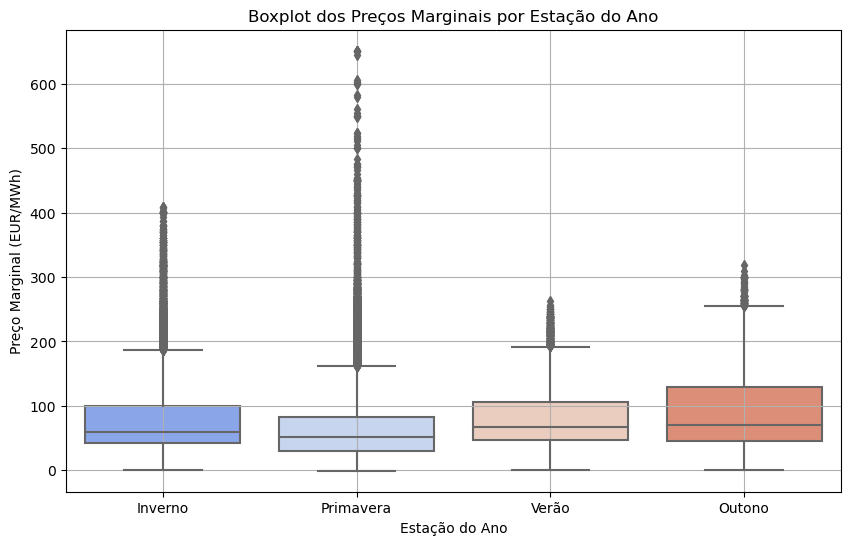

In [26]:
# Criar uma coluna para a estação do ano
estacoes = {
    1: 'Inverno',
    2: 'Inverno',
    3: 'Primavera',
    4: 'Primavera',
    5: 'Primavera',
    6: 'Verão',
    7: 'Verão',
    8: 'Verão',
    9: 'Outono',
    10: 'Outono',
    11: 'Outono',
    12: 'Inverno'
}
df['Estação'] = df['Mês'].map(estacoes)

# Plotar o boxplot dos preços marginais por estação do ano
plt.figure(figsize=(10, 6))
sns.boxplot(x='Estação', y='Preço marginal Portugal (EUR/MWh)', data=df, palette='coolwarm')
plt.title('Boxplot dos Preços Marginais por Estação do Ano')
plt.xlabel('Estação do Ano')
plt.ylabel('Preço Marginal (EUR/MWh)')
plt.grid(True)
plt.show()


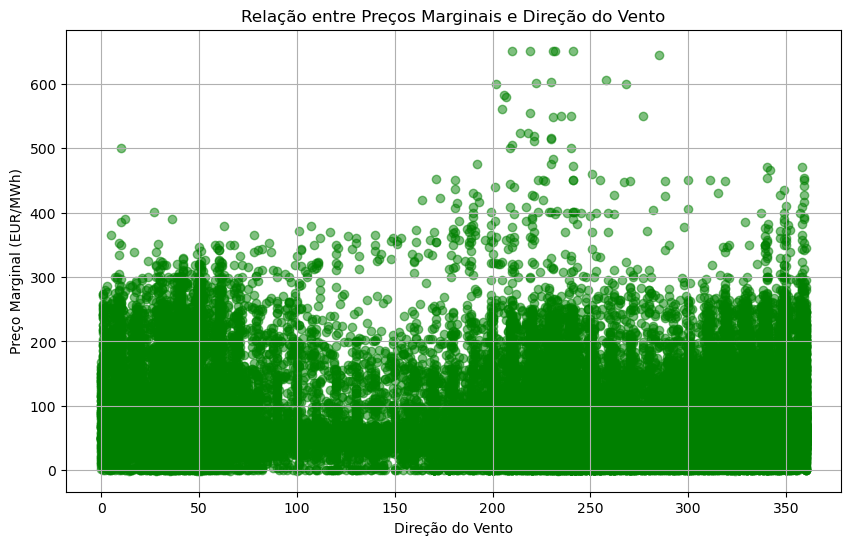

In [27]:
# Plotar o scatter plot da direção do vento em relação aos preços marginais
plt.figure(figsize=(10, 6))
plt.scatter(df['DireçãoVento'], df['Preço marginal Portugal (EUR/MWh)'], color='green', alpha=0.5)
plt.title('Relação entre Preços Marginais e Direção do Vento')
plt.xlabel('Direção do Vento')
plt.ylabel('Preço Marginal (EUR/MWh)')
plt.grid(True)
plt.show()


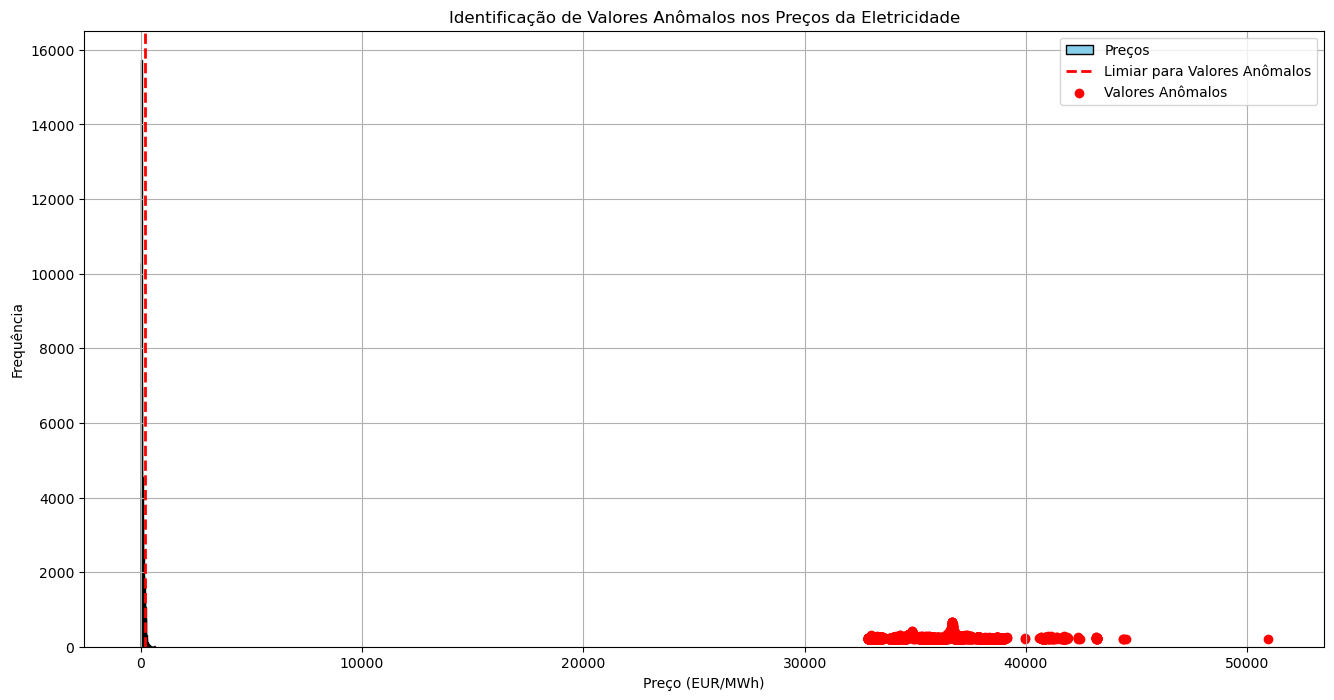

In [28]:
# Calcular a média e o desvio padrão dos preços
mean_price = df['Preço marginal Portugal (EUR/MWh)'].mean()
std_price = df['Preço marginal Portugal (EUR/MWh)'].std()

# Definir o limiar para valores anômalos (2 desvios padrão da média)
threshold2 = mean_price + 2 * std_price

# Identificar valores anômalos
anomalous_prices = df[df['Preço marginal Portugal (EUR/MWh)'] > threshold2]

# Visualizar os valores anômalos em relação aos preços
plt.figure(figsize=(16, 8))
plt.hist(df['Preço marginal Portugal (EUR/MWh)'], bins=30, color='skyblue', edgecolor='black', label='Preços')
plt.axvline(x=threshold2, color='red', linestyle='--', linewidth=2, label='Limiar para Valores Anômalos')
plt.scatter(anomalous_prices.index, anomalous_prices['Preço marginal Portugal (EUR/MWh)'], color='red', label='Valores Anômalos')
plt.title('Identificação de Valores Anômalos nos Preços da Eletricidade')
plt.xlabel('Preço (EUR/MWh)')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.show()



In [29]:
# Mostrar os valores anômalos
print("Valores Anômalos:")
print(anomalous_prices)


Valores Anômalos:
        Ano  Mês  Dia  Hora  Preço marginal Espanha (EUR/MWh)  \
32850  2021    9   30    20                            219.93   
32851  2021    9   30    21                            221.00   
32852  2021    9   30    22                            220.02   
32853  2021    9   30    23                            211.85   
32855  2021   10    1     1                            223.42   
...     ...  ...  ...   ...                               ...   
44395  2023    1   24    20                            220.00   
44396  2023    1   24    21                            218.08   
44419  2023    1   25    20                            210.34   
44539  2023    1   30    20                            220.00   
50923  2023   10   23    21                            215.02   

       Preço marginal Portugal (EUR/MWh)  \
32850                             219.93   
32851                             221.00   
32852                             220.02   
32853                    

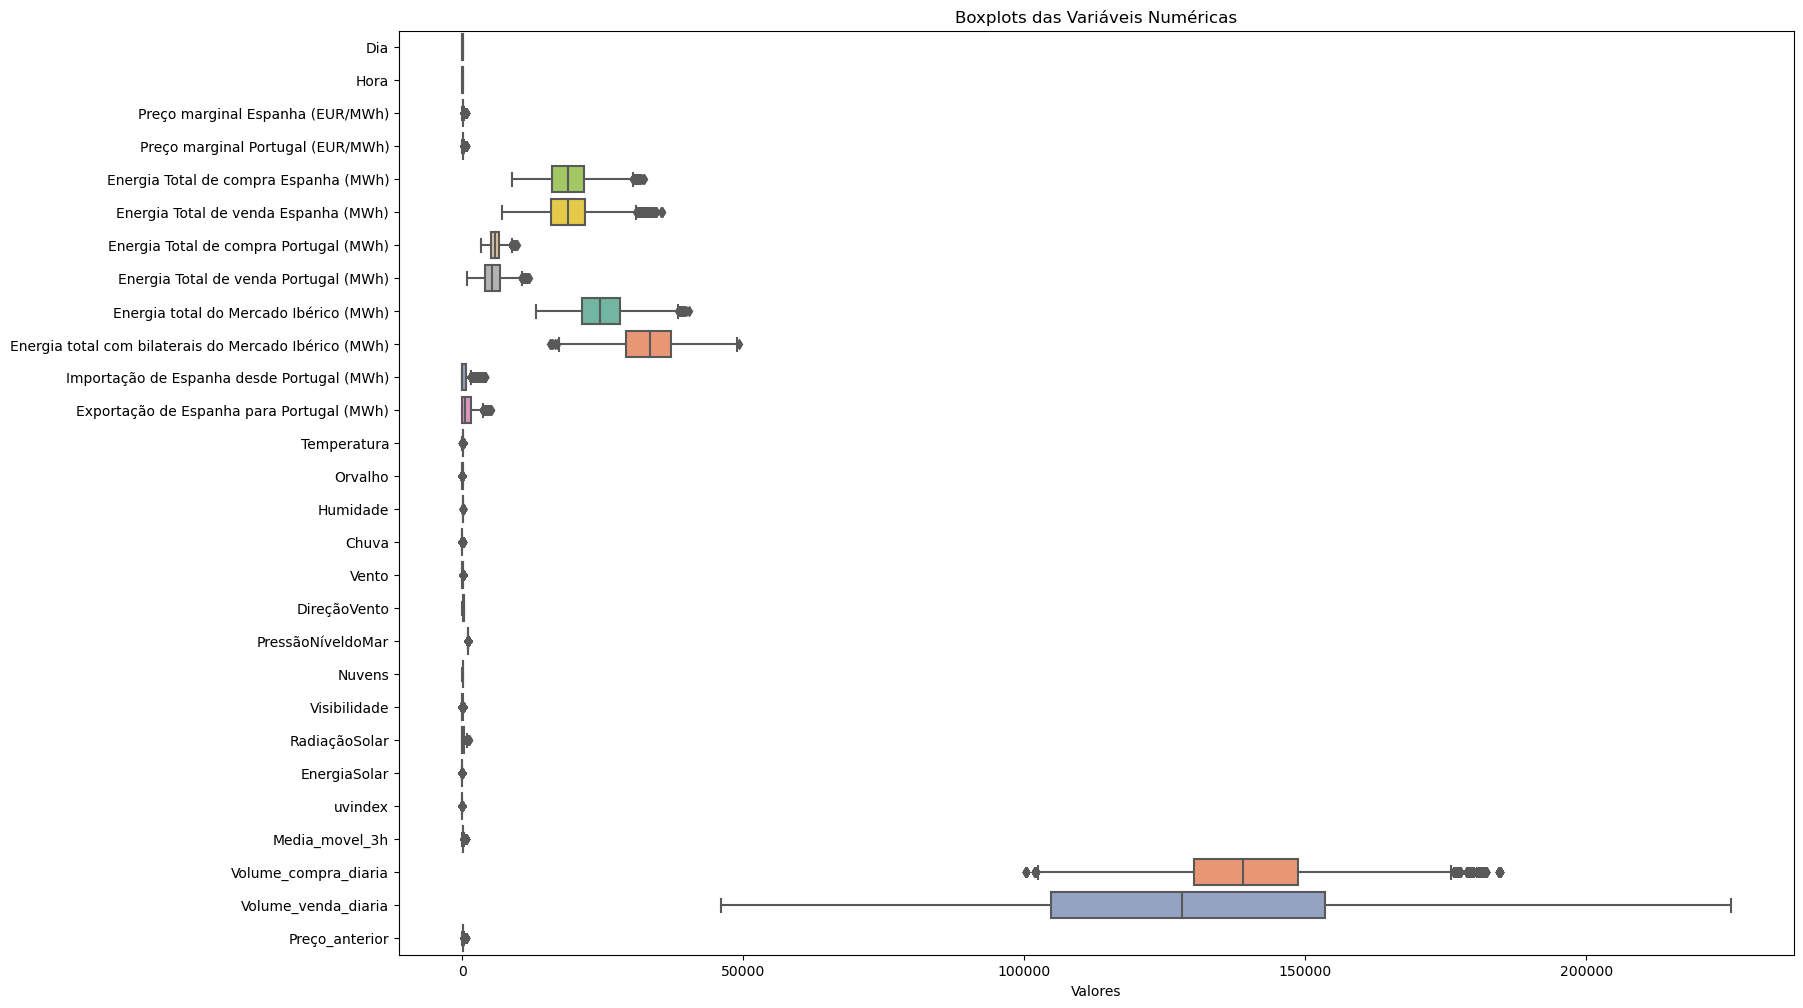

In [30]:
# Selecionar as variáveis numéricas
numeric_variables = df.select_dtypes(include=['float64', 'int64'])

# Plotar boxplots para cada variável numérica
plt.figure(figsize=(18, 12))
sns.boxplot(data=numeric_variables, orient='h', palette='Set2')
plt.title('Boxplots das Variáveis Numéricas')
plt.xlabel('Valores')
plt.show()


In [31]:
# Verificar se há valores ausentes em cada coluna
missing_values = df.isna().sum()

# Exibir as colunas com valores ausentes e a contagem de NaN em cada uma
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [32]:
print(df.columns)

Index(['Ano', 'Mês', 'Dia', 'Hora', 'Preço marginal Espanha (EUR/MWh)',
       'Preço marginal Portugal (EUR/MWh)',
       'Energia Total de compra Espanha (MWh)',
       'Energia Total de venda Espanha (MWh)',
       'Energia Total de compra Portugal (MWh)',
       'Energia Total de venda Portugal (MWh)',
       'Energia total do Mercado Ibérico (MWh)',
       'Energia total com bilaterais do Mercado Ibérico (MWh)',
       'Importação de Espanha desde Portugal (MWh)',
       'Exportação de Espanha para Portugal (MWh)', 'Temperatura', 'Orvalho',
       'Humidade', 'Chuva', 'Vento', 'DireçãoVento', 'PressãoNíveldoMar',
       'Nuvens', 'Visibilidade', 'RadiaçãoSolar', 'EnergiaSolar', 'uvindex',
       'Dia_da_semana', 'Periodo_do_dia_Madrugada', 'Periodo_do_dia_Manhã',
       'Periodo_do_dia_Tarde', 'Periodo_do_dia_Noite', 'Estação_Inverno',
       'Estação_Outono', 'Estação_Primavera', 'Estação_Verão',
       'Media_movel_3h', 'Volume_compra_diaria', 'Volume_venda_diaria',
       'Preç

In [33]:
from sklearn.model_selection import train_test_split

# Dividir os dados em features (X) e target (y)
X = df.drop(columns=['Preço marginal Portugal (EUR/MWh)'])
y = df['Preço marginal Portugal (EUR/MWh)']

# Dividir os dados em conjuntos de treinamento e teste (por exemplo, 80% para treinamento, 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar as dimensões dos conjuntos de treinamento e teste
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (44216, 40)
Shape of X_test: (11055, 40)
Shape of y_train: (44216,)
Shape of y_test: (11055,)


# Modelo de Regressão Linear

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Selecionar as características que serão usadas no modelo
features = ['Ano', 'Mês', 'Dia', 'Hora', 'Preço marginal Espanha (EUR/MWh)',
    'Energia Total de compra Espanha (MWh)',
    'Energia Total de venda Espanha (MWh)',
    'Energia Total de compra Portugal (MWh)',
    'Energia Total de venda Portugal (MWh)',
    'Energia total do Mercado Ibérico (MWh)',
    'Energia total com bilaterais do Mercado Ibérico (MWh)',
    'Importação de Espanha desde Portugal (MWh)',
    'Exportação de Espanha para Portugal (MWh)', 'Temperatura', 'Orvalho',
    'Humidade', 'Chuva', 'Vento', 'DireçãoVento', 'PressãoNíveldoMar',
    'Nuvens', 'Visibilidade', 'RadiaçãoSolar', 'EnergiaSolar', 'uvindex',
    'Dia_da_semana', 'Periodo_do_dia_Madrugada', 'Periodo_do_dia_Manhã',
    'Periodo_do_dia_Tarde', 'Periodo_do_dia_Noite', 'Estação_Inverno',
    'Estação_Outono', 'Estação_Primavera', 'Estação_Verão',
    'Media_movel_3h', 'Volume_compra_diaria', 'Volume_venda_diaria', 'Preço_anterior']

X_train = X_train[features]
X_test = X_test[features]

# Criar e treinar o modelo de regressão linear
LRmodel = LinearRegression()
LRmodel.fit(X_train, y_train)

# Fazer previsões nos dados de teste
predictions = LRmodel.predict(X_test)

# Avaliar o desempenho do modelo usando a erro médio quadrático (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print("RMSE:", rmse)

# Calcular R²
r2 = r2_score(y_test, predictions)
print("R²:", r2)


RMSE: 3.4324588051329883
R²: 0.9971542660537784


In [35]:
# Verificar informações sobre os dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55271 entries, 0 to 55270
Data columns (total 41 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Ano                                                    55271 non-null  int32         
 1   Mês                                                    55271 non-null  int32         
 2   Dia                                                    55271 non-null  int64         
 3   Hora                                                   55271 non-null  int64         
 4   Preço marginal Espanha (EUR/MWh)                       55271 non-null  float64       
 5   Preço marginal Portugal (EUR/MWh)                      55271 non-null  float64       
 6   Energia Total de compra Espanha (MWh)                  55271 non-null  float64       
 7   Energia Total de venda Espanha (MWh)                   55271 non-nu

In [36]:
from datetime import datetime, timedelta

# Função para fazer previsões para os próximos n dias
def Previsoes_LR(LRmodel, dados, n_dias):
    # Selecionar as características usadas no modelo
    features = ['Ano', 'Mês', 'Dia', 'Hora', 'Preço marginal Espanha (EUR/MWh)',
        'Energia Total de compra Espanha (MWh)',
        'Energia Total de venda Espanha (MWh)',
        'Energia Total de compra Portugal (MWh)',
        'Energia Total de venda Portugal (MWh)',
        'Energia total do Mercado Ibérico (MWh)',
        'Energia total com bilaterais do Mercado Ibérico (MWh)',
        'Importação de Espanha desde Portugal (MWh)',
        'Exportação de Espanha para Portugal (MWh)', 'Temperatura', 'Orvalho',
        'Humidade', 'Chuva', 'Vento', 'DireçãoVento', 'PressãoNíveldoMar',
        'Nuvens', 'Visibilidade', 'RadiaçãoSolar', 'EnergiaSolar', 'uvindex',
        'Dia_da_semana', 'Periodo_do_dia_Madrugada', 'Periodo_do_dia_Manhã',
        'Periodo_do_dia_Tarde', 'Periodo_do_dia_Noite', 'Estação_Inverno',
        'Estação_Outono', 'Estação_Primavera', 'Estação_Verão',
        'Media_movel_3h', 'Volume_compra_diaria', 'Volume_venda_diaria', 'Preço_anterior']
    
    # Selecionar os dados até a última data disponível
    ultimos_valores = df.iloc[-1][features]
    
    # Criar o DataFrame para os próximos dias
    proximas_datas = [df['Data'].iloc[-1] + timedelta(days=i) for i in range(1, n_dias+1)]
    proximos_dias = pd.DataFrame(index=proximas_datas, columns=features)
    proximos_dias.loc[:, :] = ultimos_valores.values.reshape(1, -1)
    
    # Preencher os dados dos próximos dias com valores médios dos últimos dias disponíveis
    #for feature in features:
        #proximos_dias[feature] = df[feature].rolling(window=7, min_periods=1).mean().iloc[-1]
 
    # Fazer previsões para os próximos dias
    previsoes = LRmodel.predict(proximos_dias)
    
    return proximas_datas, previsoes


# Fazer previsões para os próximos 30 dias
proximas_datas, previsoes = Previsoes_LR(LRmodel, df, 30)

# Exibir as previsões para os próximos 30 dias
print("Previsões para os próximos 30 dias:")
for data, preco in zip(proximas_datas, previsoes):
    print(f"{data.date()}: {preco:.2f} EUR/MWh")


Previsões para os próximos 30 dias:
2024-04-24: 5.98 EUR/MWh
2024-04-25: 5.98 EUR/MWh
2024-04-26: 5.98 EUR/MWh
2024-04-27: 5.98 EUR/MWh
2024-04-28: 5.98 EUR/MWh
2024-04-29: 5.98 EUR/MWh
2024-04-30: 5.98 EUR/MWh
2024-05-01: 5.98 EUR/MWh
2024-05-02: 5.98 EUR/MWh
2024-05-03: 5.98 EUR/MWh
2024-05-04: 5.98 EUR/MWh
2024-05-05: 5.98 EUR/MWh
2024-05-06: 5.98 EUR/MWh
2024-05-07: 5.98 EUR/MWh
2024-05-08: 5.98 EUR/MWh
2024-05-09: 5.98 EUR/MWh
2024-05-10: 5.98 EUR/MWh
2024-05-11: 5.98 EUR/MWh
2024-05-12: 5.98 EUR/MWh
2024-05-13: 5.98 EUR/MWh
2024-05-14: 5.98 EUR/MWh
2024-05-15: 5.98 EUR/MWh
2024-05-16: 5.98 EUR/MWh
2024-05-17: 5.98 EUR/MWh
2024-05-18: 5.98 EUR/MWh
2024-05-19: 5.98 EUR/MWh
2024-05-20: 5.98 EUR/MWh
2024-05-21: 5.98 EUR/MWh
2024-05-22: 5.98 EUR/MWh
2024-05-23: 5.98 EUR/MWh


# ARIMA

In [37]:
print(df.columns)

Index(['Ano', 'Mês', 'Dia', 'Hora', 'Preço marginal Espanha (EUR/MWh)',
       'Preço marginal Portugal (EUR/MWh)',
       'Energia Total de compra Espanha (MWh)',
       'Energia Total de venda Espanha (MWh)',
       'Energia Total de compra Portugal (MWh)',
       'Energia Total de venda Portugal (MWh)',
       'Energia total do Mercado Ibérico (MWh)',
       'Energia total com bilaterais do Mercado Ibérico (MWh)',
       'Importação de Espanha desde Portugal (MWh)',
       'Exportação de Espanha para Portugal (MWh)', 'Temperatura', 'Orvalho',
       'Humidade', 'Chuva', 'Vento', 'DireçãoVento', 'PressãoNíveldoMar',
       'Nuvens', 'Visibilidade', 'RadiaçãoSolar', 'EnergiaSolar', 'uvindex',
       'Dia_da_semana', 'Periodo_do_dia_Madrugada', 'Periodo_do_dia_Manhã',
       'Periodo_do_dia_Tarde', 'Periodo_do_dia_Noite', 'Estação_Inverno',
       'Estação_Outono', 'Estação_Primavera', 'Estação_Verão',
       'Media_movel_3h', 'Volume_compra_diaria', 'Volume_venda_diaria',
       'Preç

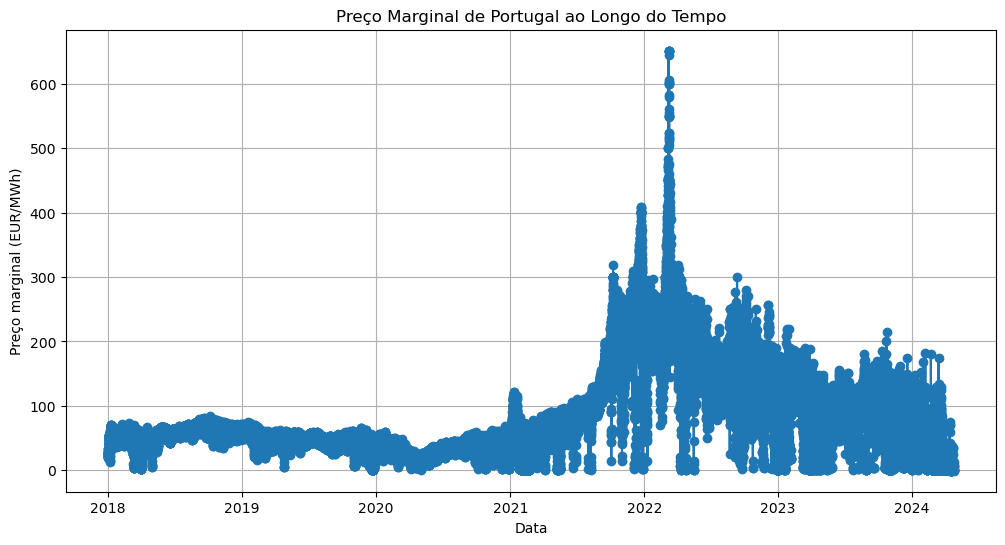

In [38]:
import matplotlib.pyplot as plt

# Defina os dados que você deseja plotar
x = df['Data']  # Data
y = df['Preço marginal Portugal (EUR/MWh)']  # Preço marginal de Portugal

# Crie o gráfico
plt.figure(figsize=(12, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.title('Preço Marginal de Portugal ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço marginal (EUR/MWh)')
plt.grid(True)
plt.show()

In [39]:
# Verificar se há valores ausentes
missing_values = df.isnull().sum()
print("Valores Ausentes:\n", missing_values)

Valores Ausentes:
 Ano                                                      0
Mês                                                      0
Dia                                                      0
Hora                                                     0
Preço marginal Espanha (EUR/MWh)                         0
Preço marginal Portugal (EUR/MWh)                        0
Energia Total de compra Espanha (MWh)                    0
Energia Total de venda Espanha (MWh)                     0
Energia Total de compra Portugal (MWh)                   0
Energia Total de venda Portugal (MWh)                    0
Energia total do Mercado Ibérico (MWh)                   0
Energia total com bilaterais do Mercado Ibérico (MWh)    0
Importação de Espanha desde Portugal (MWh)               0
Exportação de Espanha para Portugal (MWh)                0
Temperatura                                              0
Orvalho                                                  0
Humidade                             

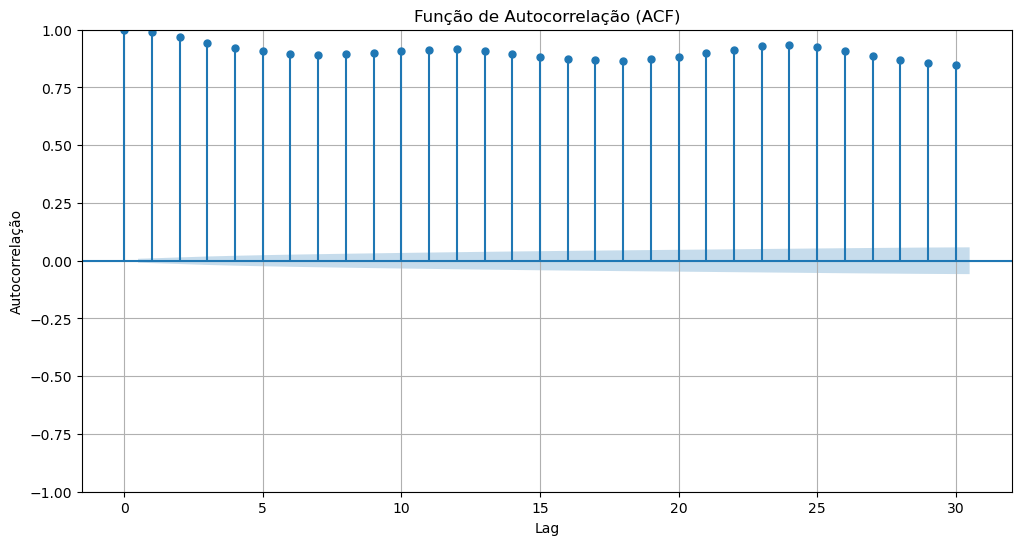

In [40]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot da função de autocorrelação (ACF)
plt.figure(figsize=(12, 6))
plot_acf(df['Preço marginal Portugal (EUR/MWh)'], lags=30, ax=plt.gca())
plt.title('Função de Autocorrelação (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelação')
plt.grid(True)
plt.show()


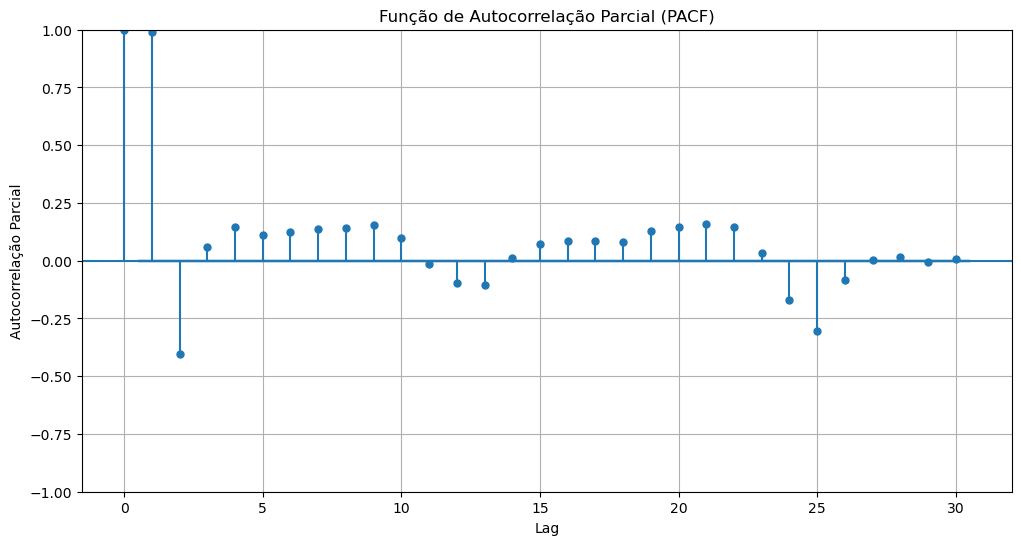

In [41]:

# Plot da função de autocorrelação parcial (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(df['Preço marginal Portugal (EUR/MWh)'], lags=30, ax=plt.gca())
plt.title('Função de Autocorrelação Parcial (PACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelação Parcial')
plt.grid(True)
plt.show()


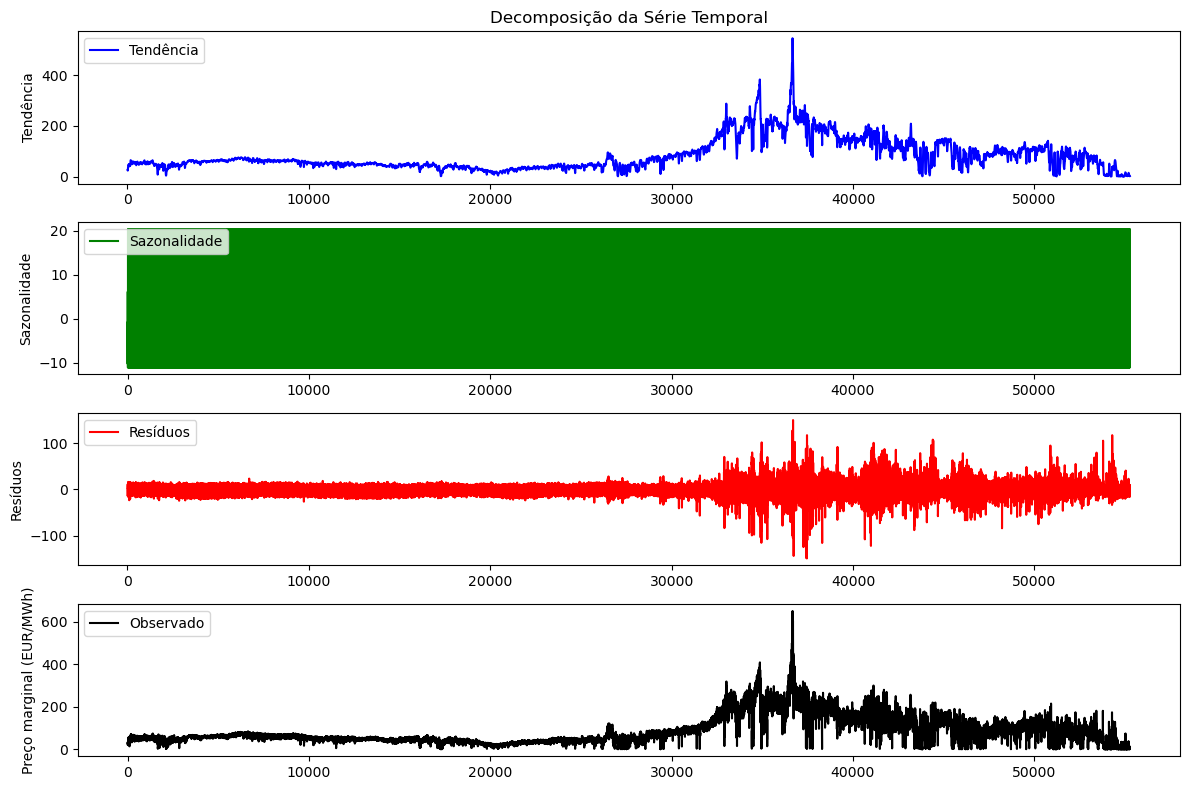

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposição da série temporal
result = seasonal_decompose(df['Preço marginal Portugal (EUR/MWh)'], model='additive', period=24)

# Plot dos componentes
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(result.trend, label='Tendência', color='blue')
plt.title('Decomposição da Série Temporal')
plt.ylabel('Tendência')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.seasonal, label='Sazonalidade', color='green')
plt.ylabel('Sazonalidade')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.resid, label='Resíduos', color='red')
plt.ylabel('Resíduos')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(df['Preço marginal Portugal (EUR/MWh)'], label='Observado', color='black')
plt.ylabel('Preço marginal (EUR/MWh)')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [43]:
# Definir a coluna de data como índice

df.set_index('Data', inplace=True)

Tamanho do conjunto de treinamento: 44216
Tamanho do conjunto de teste: 11054


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

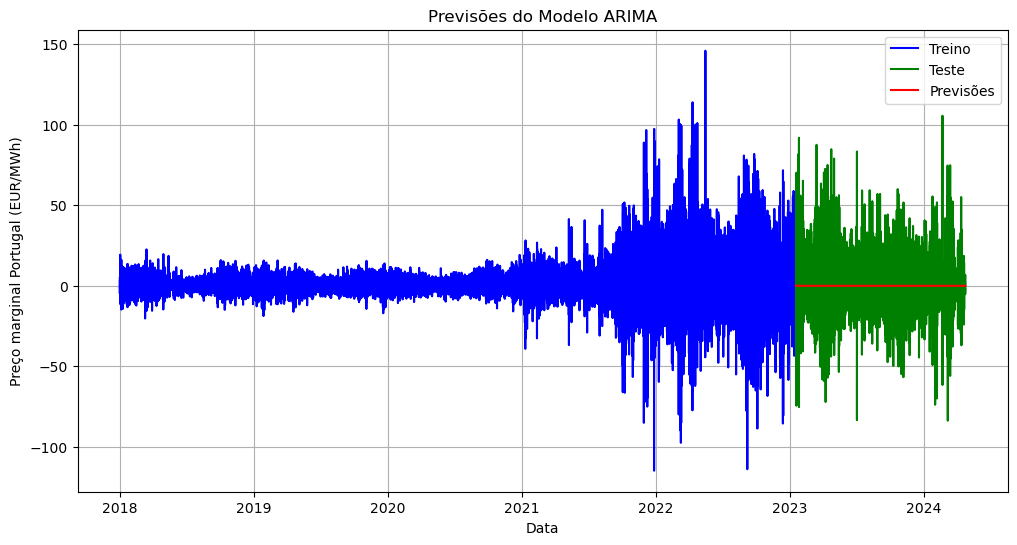

Mean Absolute Error (MAE): 7.5167355361807715
Coefficient of Determination (R²): -6.19544695545926e-08


In [44]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Handle missing values (if any)
df.fillna(method="ffill", inplace=True)  # Replace missing values with previous value

# Decompose trend and seasonality (optional, can be helpful for some data)
decomposition = seasonal_decompose(df['Preço marginal Portugal (EUR/MWh)'], model='additive', period=24)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Use differencing to make data stationary (if necessary)
df_diff = df["Preço marginal Portugal (EUR/MWh)"].diff().dropna()

# Define features (use differenced or original data based on stationarity check)
features = df_diff  # Adjust based on feature engineering

# Split data into training and test sets
train_size = 0.8
test_size = 1 - train_size
train, test = train_test_split(df_diff, train_size=train_size, test_size=test_size, shuffle=False)

print("Tamanho do conjunto de treinamento:", len(train))
print("Tamanho do conjunto de teste:", len(test))

# Define the ARIMA model with initial parameters
Arima_model = ARIMA(train, order=(1, 0, 0))

# Fit the ARIMA model
Arima_model_fit = Arima_model.fit()

# Forecast using the ARIMA model
forecast_values = Arima_model_fit.forecast(steps=len(test))

# Evaluate the model on the test set
mae = mean_absolute_error(test, forecast_values)
r2 = r2_score(test, forecast_values)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Treino', color='blue')
plt.plot(test.index, test, label='Teste', color='green')
plt.plot(test.index, forecast_values, label='Previsões', color='red')
plt.title('Previsões do Modelo ARIMA')
plt.xlabel('Data')
plt.ylabel('Preço marginal Portugal (EUR/MWh)')
plt.legend()
plt.grid(True)
plt.show()

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R²):", r2)


In [45]:
print(model_fit.summary())

                                       SARIMAX Results                                       
Dep. Variable:     Preço marginal Portugal (EUR/MWh)   No. Observations:                44216
Model:                                ARIMA(2, 1, 1)   Log Likelihood             -157217.814
Date:                               Wed, 01 May 2024   AIC                         314443.629
Time:                                       18:32:49   BIC                         314478.416
Sample:                                            0   HQIC                        314454.588
                                             - 44216                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4246      0.002    234.112      0.000       0.421       0.428
ar.L2      

Tamanho do conjunto de treinamento: 44216
Tamanho do conjunto de teste: 11055


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(0, 0, 0) MAE: 36.48866351737618


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\User

ARIMA(0, 0, 1) MAE: 36.48514377206717


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\User

ARIMA(0, 0, 2) MAE: 36.481528931410345


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\User

ARIMA(0, 0, 3) MAE: 36.478306109830925


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(0, 1, 0) MAE: 72.69630483943916


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(0, 1, 1) MAE: 72.92861380498911


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(0, 1, 2) MAE: 72.9129921593837


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(0, 1, 3) MAE: 72.90295008480737


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(0, 2, 0) MAE: 72.69630483188408


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(0, 2, 1) MAE: 3560.835095112994


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(0, 2, 2) MAE: 75.64822964022991


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(0, 2, 3) MAE: 75.85691629824908


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(1, 0, 0) MAE: 36.12795633300129


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(1, 0, 1) MAE: 36.171336692657746


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(1, 0, 2) MAE: 36.225300011505865


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(1, 0, 3) MAE: 36.23302839184044


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(1, 1, 0) MAE: 72.69630483943916


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(1, 1, 1) MAE: 72.80334154644778


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_predict

ARIMA(1, 1, 2) MAE: 59.04390445184904


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

ARIMA(1, 1, 3) MAE: 63.59765933170467


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(1, 2, 0) MAE: 2957.3525416553807


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(1, 2, 1) MAE: 303.65871905358233


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(1, 2, 2) MAE: 86.49786188910576


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(1, 2, 3) MAE: 77.05386389810735


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(2, 0, 0) MAE: 36.244321106426746


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(2, 0, 1) MAE: 36.23563445362157


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(2, 0, 2) MAE: 36.23015870231157


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

ARIMA(2, 0, 3) MAE: 36.232119934389985


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(2, 1, 0) MAE: 72.89477867015565


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

ARIMA(2, 1, 1) MAE: 67.63684112455306


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(2, 1, 2) MAE: 69.60499161705349


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

ARIMA(2, 1, 3) MAE: 81.15743124253704


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(2, 2, 0) MAE: 3376.355417192204


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

ARIMA(2, 2, 1) MAE: 75.92555256909347


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(2, 2, 2) MAE: 74.61430330632722


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(2, 2, 3) MAE: 105.04877378301181


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(3, 0, 0) MAE: 36.227734034128964


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\danil\a

ARIMA(3, 0, 1) MAE: 36.246233626970685


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(3, 0, 2) MAE: 38.38499681711272


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

ARIMA(3, 0, 3) MAE: 36.19558602758608


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(3, 1, 0) MAE: 73.29500281325171


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(3, 1, 1) MAE: 69.0919741432152


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\User

ARIMA(3, 1, 2) MAE: 69.59630790340573


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\User

ARIMA(3, 1, 3) MAE: 69.52989277178447


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

ARIMA(3, 2, 0) MAE: 2740.7212651255427


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_predict

ARIMA(3, 2, 1) MAE: 78.16355957290871


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\User

ARIMA(3, 2, 2) MAE: 212.19137460208972


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

ARIMA(3, 2, 3) MAE: 74.67466913840113
Best ARIMA Order: (1, 0, 0) with MAE: 36.12795633300129


C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\danil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


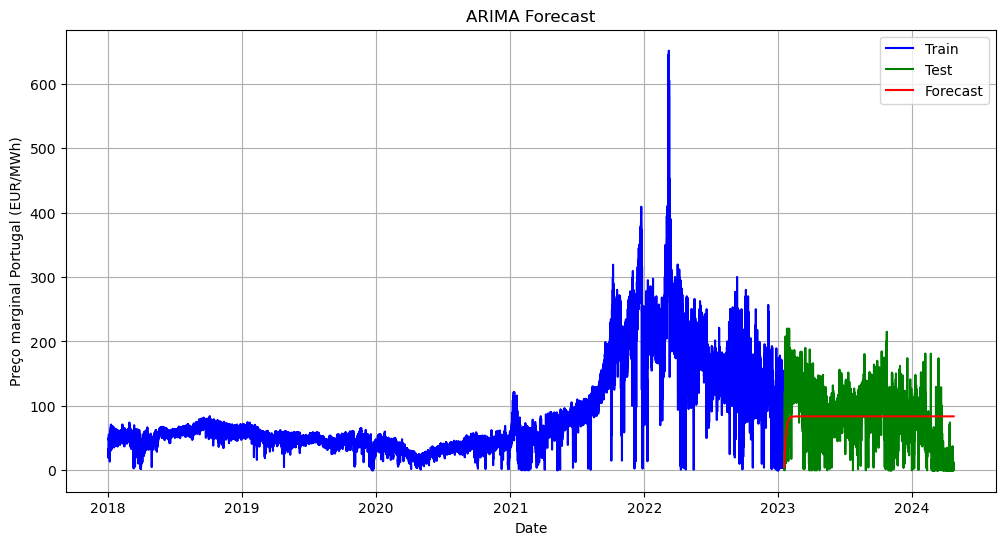

Mean Absolute Error (MAE): 36.12795633300129
Coefficient of Determination (R²): -0.01736463757469342


In [46]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Handle missing values (if any)
df.fillna(method="ffill", inplace=True)  # Replace missing values with previous value

# Decompose trend and seasonality (optional, can be helpful for some data)
decomposition = seasonal_decompose(df['Preço marginal Portugal (EUR/MWh)'], model='additive', period=24)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Use differencing to make data stationary (if necessary)
df_diff = df["Preço marginal Portugal (EUR/MWh)"].diff().dropna()

# Define features (use differenced or original data based on stationarity check)
features = df_diff  # Adjust based on feature engineering

train_size = 0.8
test_size = 1 - train_size
train, test = train_test_split(df['Preço marginal Portugal (EUR/MWh)'], train_size=train_size, test_size=test_size, shuffle=False)

print("Tamanho do conjunto de treinamento:", len(train))
print("Tamanho do conjunto de teste:", len(test))

# Grid search for ARIMA parameters
best_mae = np.inf
best_order = None
best_model = None

for p in range(0, 4):
    for d in range(0, 3):
        for q in range(0, 4):
            order = (p, d, q)
            try:
                # Define the ARIMA model with current parameters
                model = ARIMA(train, order=order)

                # Fit the model
                results = model.fit()

                # Forecast using the model
                forecast = results.forecast(steps=len(test))

                # Calculate MAE
                mae = mean_absolute_error(test, forecast)

                # Update best model if current MAE is better
                if mae < best_mae:
                    best_mae = mae
                    best_order = order
                    best_model = model

                print(f"ARIMA{order} MAE: {mae}")

            except:
                continue

print(f"Best ARIMA Order: {best_order} with MAE: {best_mae}")

# Forecast using the best model
best_results = best_model.fit()
forecast_values = best_results.forecast(steps=len(test))

# Calculate MAE and R-squared
mae = mean_absolute_error(test, forecast_values)
r2 = r2_score(test, forecast_values)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(test.index, forecast_values, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Preço marginal Portugal (EUR/MWh)')
plt.legend()
plt.grid(True)
plt.show()

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R²):", r2)


In [47]:
print(best_results.summary())

                                       SARIMAX Results                                       
Dep. Variable:     Preço marginal Portugal (EUR/MWh)   No. Observations:                44216
Model:                                ARIMA(1, 0, 0)   Log Likelihood             -161071.950
Date:                               Wed, 01 May 2024   AIC                         322149.899
Time:                                       18:44:26   BIC                         322175.990
Sample:                                            0   HQIC                        322158.119
                                             - 44216                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.7030      6.491     12.896      0.000      70.982      96.424
ar.L1      

# LSTM Model

In [52]:
df.reset_index(inplace=True)

In [53]:
df = df.set_index('Data').reset_index()

In [54]:
print(df.head(5))

                 Data   Ano  Mês  Dia  Hora  Preço marginal Espanha (EUR/MWh)  \
0 2018-01-01 01:00:00  2018    1    1     1                              6.74   
1 2018-01-01 02:00:00  2018    1    1     2                              4.74   
2 2018-01-01 03:00:00  2018    1    1     3                              3.66   
3 2018-01-01 04:00:00  2018    1    1     4                              2.30   
4 2018-01-01 05:00:00  2018    1    1     5                              2.30   

   Preço marginal Portugal (EUR/MWh)  Energia Total de compra Espanha (MWh)  \
0                               28.1                                17596.0   
1                               33.0                                16527.1   
2                               32.9                                15702.5   
3                               28.1                                15288.2   
4                               27.6                                14938.7   

   Energia Total de venda Espanha (MWh

In [49]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Epoch 1/50


C:\Users\danil\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1382/1382 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0237 - val_loss: 1.8391e-06
Epoch 2/50
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 9.1875e-07 - val_loss: 1.6622e-05
Epoch 3/50
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.3411e-07 - val_loss: 2.1175e-05
Epoch 4/50
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3024e-07 - val_loss: 1.1192e-05
Epoch 5/50
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3268e-07 - val_loss: 8.5732e-06
Epoch 6/50
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.5319e-07 - val_loss: 6.8897e-06
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Erro Médio Absoluto (MAE): 1.6941344434083686e+18


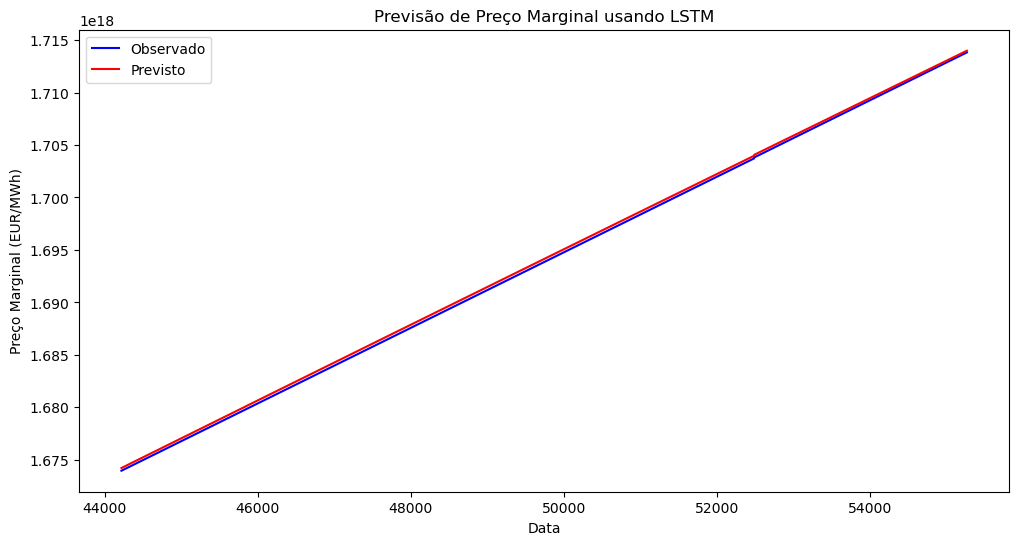

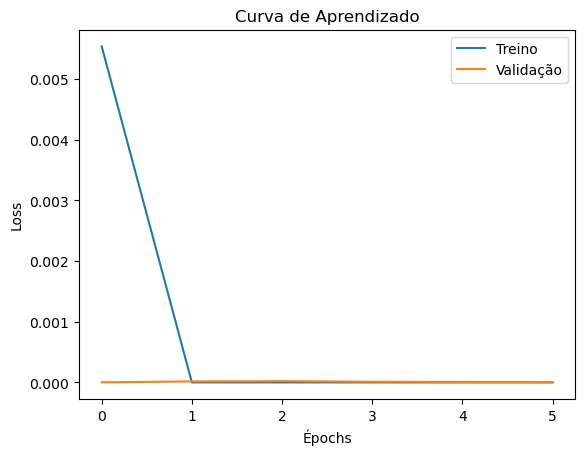

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Certifique-se de que seus dados estejam em uma única coluna com a data como índice
data = df['Data'].values.reshape(-1, 1)

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Dividir os dados em treino e teste
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

# Função para criar séries temporais com janela deslizante
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Criar os dados de treinamento e teste com janela deslizante
time_step = 1
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape dos dados para o formato [amostras, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Construir o modelo LSTM
LSTM_model = Sequential()
LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
LSTM_model.add(LSTM(units=50))
LSTM_model.add(Dense(units=1))

# Compilar o modelo
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')

# Definir o callback de parada antecipada
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Treinar o modelo com o callback de parada antecipada
history = LSTM_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Prever os preços para os dados de teste
predicted_prices = LSTM_model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Avaliar o modelo
mae = np.mean(np.abs(y_test - predicted_prices))
print("Erro Médio Absoluto (MAE):", mae)

# Plotar os resultados
plt.figure(figsize=(12,6))
plt.plot(df.index[train_size+time_step+1:], scaler.inverse_transform(test_data)[time_step+1:], label='Observado', color='blue')
plt.plot(df.index[train_size+time_step+1:], predicted_prices, label='Previsto', color='red')
plt.title('Previsão de Preço Marginal usando LSTM')
plt.xlabel('Data')
plt.ylabel('Preço Marginal (EUR/MWh)')
plt.legend()
plt.show()

# Plotar a curva de aprendizado
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.title('Curva de Aprendizado')
plt.legend()
plt.show()


Epoch 1/50


C:\Users\danil\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1382/1382 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0031 - val_loss: 3.3775e-04
Epoch 2/50
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0900e-04 - val_loss: 3.4117e-04
Epoch 3/50
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.0308e-04 - val_loss: 3.7485e-04
Epoch 4/50
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.2467e-04 - val_loss: 3.4065e-04
Epoch 5/50
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.2299e-04 - val_loss: 3.5495e-04
Epoch 6/50
1382/1382 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1359e-04 - val_loss: 3.4282e-04
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Erro Médio Absoluto (MAE): 75.37275818099225


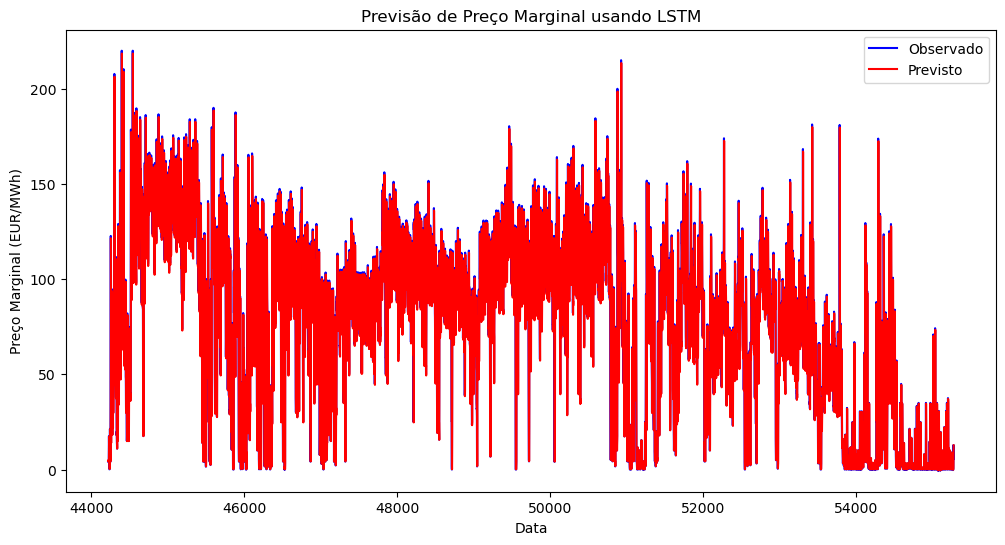

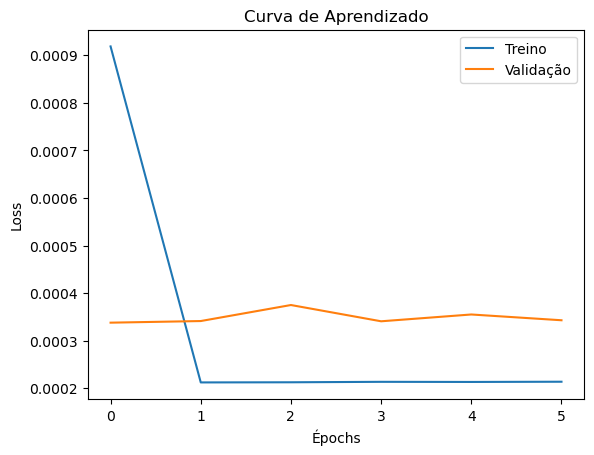

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Certifique-se de que seus dados estejam em uma única coluna com a data como índice
data = df['Preço marginal Portugal (EUR/MWh)'].values.reshape(-1, 1)

# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Dividir os dados em treino e teste
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

# Função para criar séries temporais com janela deslizante
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Criar os dados de treinamento e teste com janela deslizante
time_step = 1
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape dos dados para o formato [amostras, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Construir o modelo LSTM
LSTM_model = Sequential()
LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
LSTM_model.add(LSTM(units=50))
LSTM_model.add(Dense(units=1))

# Compilar o modelo
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')

# Definir o callback de parada antecipada
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Treinar o modelo com o callback de parada antecipada
history = LSTM_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Prever os preços para os dados de teste
predicted_prices = LSTM_model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Avaliar o modelo
mae = np.mean(np.abs(y_test - predicted_prices))
print("Erro Médio Absoluto (MAE):", mae)

# Plotar os resultados
plt.figure(figsize=(12,6))
plt.plot(df.index[train_size+time_step+1:], scaler.inverse_transform(test_data)[time_step+1:], label='Observado', color='blue')
plt.plot(df.index[train_size+time_step+1:], predicted_prices, label='Previsto', color='red')
plt.title('Previsão de Preço Marginal usando LSTM')
plt.xlabel('Data')
plt.ylabel('Preço Marginal (EUR/MWh)')
plt.legend()
plt.show()

# Plotar a curva de aprendizado
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.title('Curva de Aprendizado')
plt.legend()
plt.show()


In [72]:
import numpy as np
import pandas as pd

def Previsoes_LSTM(df, LSTM_model, scaler, time_step):
    # Número de dias para prever no futuro
    dias_para_prever = 30

    # Obter a última data presente no conjunto de dados
    ultima_data = df['Data'].iloc[-1]

    # Gerar datas para os próximos 30 dias a partir da última data presente no conjunto de dados
    proximas_datas = pd.date_range(start=ultima_data + pd.Timedelta(days=1), periods=dias_para_prever, freq='D')

    # Preparar os dados até a última data disponível
    data_ate_ultima_data = df['Preço marginal Portugal (EUR/MWh)'].values.reshape(-1, 1)
    scaled_data_ate_ultima_data = scaler.transform(data_ate_ultima_data)

    # Criar as sequências temporais com janela deslizante até a última data disponível
    X_ate_ultima_data, _ = create_dataset(scaled_data_ate_ultima_data, time_step)

    # Reshape dos dados para o formato [amostras, time steps, features]
    X_ate_ultima_data = X_ate_ultima_data.reshape(X_ate_ultima_data.shape[0], X_ate_ultima_data.shape[1], 1)

    # Fazer a previsão para os próximos 30 dias
    previsao_futura = []
    ultimo_X = X_ate_ultima_data[-1]
    for i in range(dias_para_prever):
        # Fazer a previsão para o próximo dia
        proximo_dia = LSTM_model.predict(ultimo_X.reshape(1, time_step, 1))
        # Adicionar a previsão à lista de previsões
        previsao_futura.append(proximo_dia[0, 0])
        # Atualizar o último X com a nova previsão e remover o primeiro elemento
        ultimo_X = np.append(ultimo_X[1:], proximo_dia, axis=0)

    # Inverter a escala das previsões
    previsao_futura = scaler.inverse_transform(np.array(previsao_futura).reshape(-1, 1))

    # Criar um DataFrame para armazenar as previsões
    previsoes_df = pd.DataFrame({'Data': proximas_datas, 'Preço marginal Portugal (EUR/MWh)': previsao_futura.flatten()})
    previsoes_df.set_index('Data', inplace=True)

    return previsoes_df

# Utilize a função para gerar as previsões para os próximos 30 dias
previsoes_30_dias = Previsoes_LSTM(df, LSTM_model, scaler, time_step)
print(previsoes_30_dias)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━